In [ ]:
import pandas as pd
import numpy as np
import types
import itertools
import pickle
import joblib
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn.metrics import jaccard_similarity_score,f1_score,log_loss,roc_auc_score,classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from scipy import stats
import scipy.optimize as opt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import matplotlib.ticker as ticker
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning) 

In [2]:
!pip install joblib

In [3]:
!pip install -U imbalanced-learn
!conda install -c conda-forge imbalanced-learn --yes
#from imblearn.over_sampling import SMOTE

Requirement already up-to-date: imbalanced-learn in /opt/anaconda3/lib/python3.7/site-packages (0.6.2)
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                           pkgs/main --> conda-forge



conda-4.8.2          | 3.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [4]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


# A Systematic Exploration of Health Data from Wearable Devices and Implementation of A Machine Learning Model to Predict User's Sickness

### Developed by Asif Iqbal (email: asif.iqbal@mail.mcgill.ca)

The objective of this project is to utilize the health data acquired by wearable devices (e.g., smart watch) to develop a predictive model based on machine learning (ML) algorithms. The final outcome of this model is to predict whether a specific user feels sick or not sick with the health data obtained from that user. This report outlines a detailed demonstration of how to achieve this goal, which is also summarized in the following figure. In this regard, we started our discussion by looking into the raw data and building our solid understanding of the data. Then we performed an elaborate exploratory data analysis including formulation of new features, imputation of missing value, statistical analysis and data visualization. This process delivered a clean dataset, which turned out to be extremely powerful to predict user's sickness. This project also tackled the critical issues originating due to the imbalance nature of our dataset. In this project, we developed 7 machine learning models and optimized each model by tuning the hyperparameters. Throughout our exhaustive analysis, we have developed the best performing machine learning model using an optimally designed Gradient Boosting classifier that can predict a user's sickness with an F1-score of 0.97 and a recall score of 0.96.

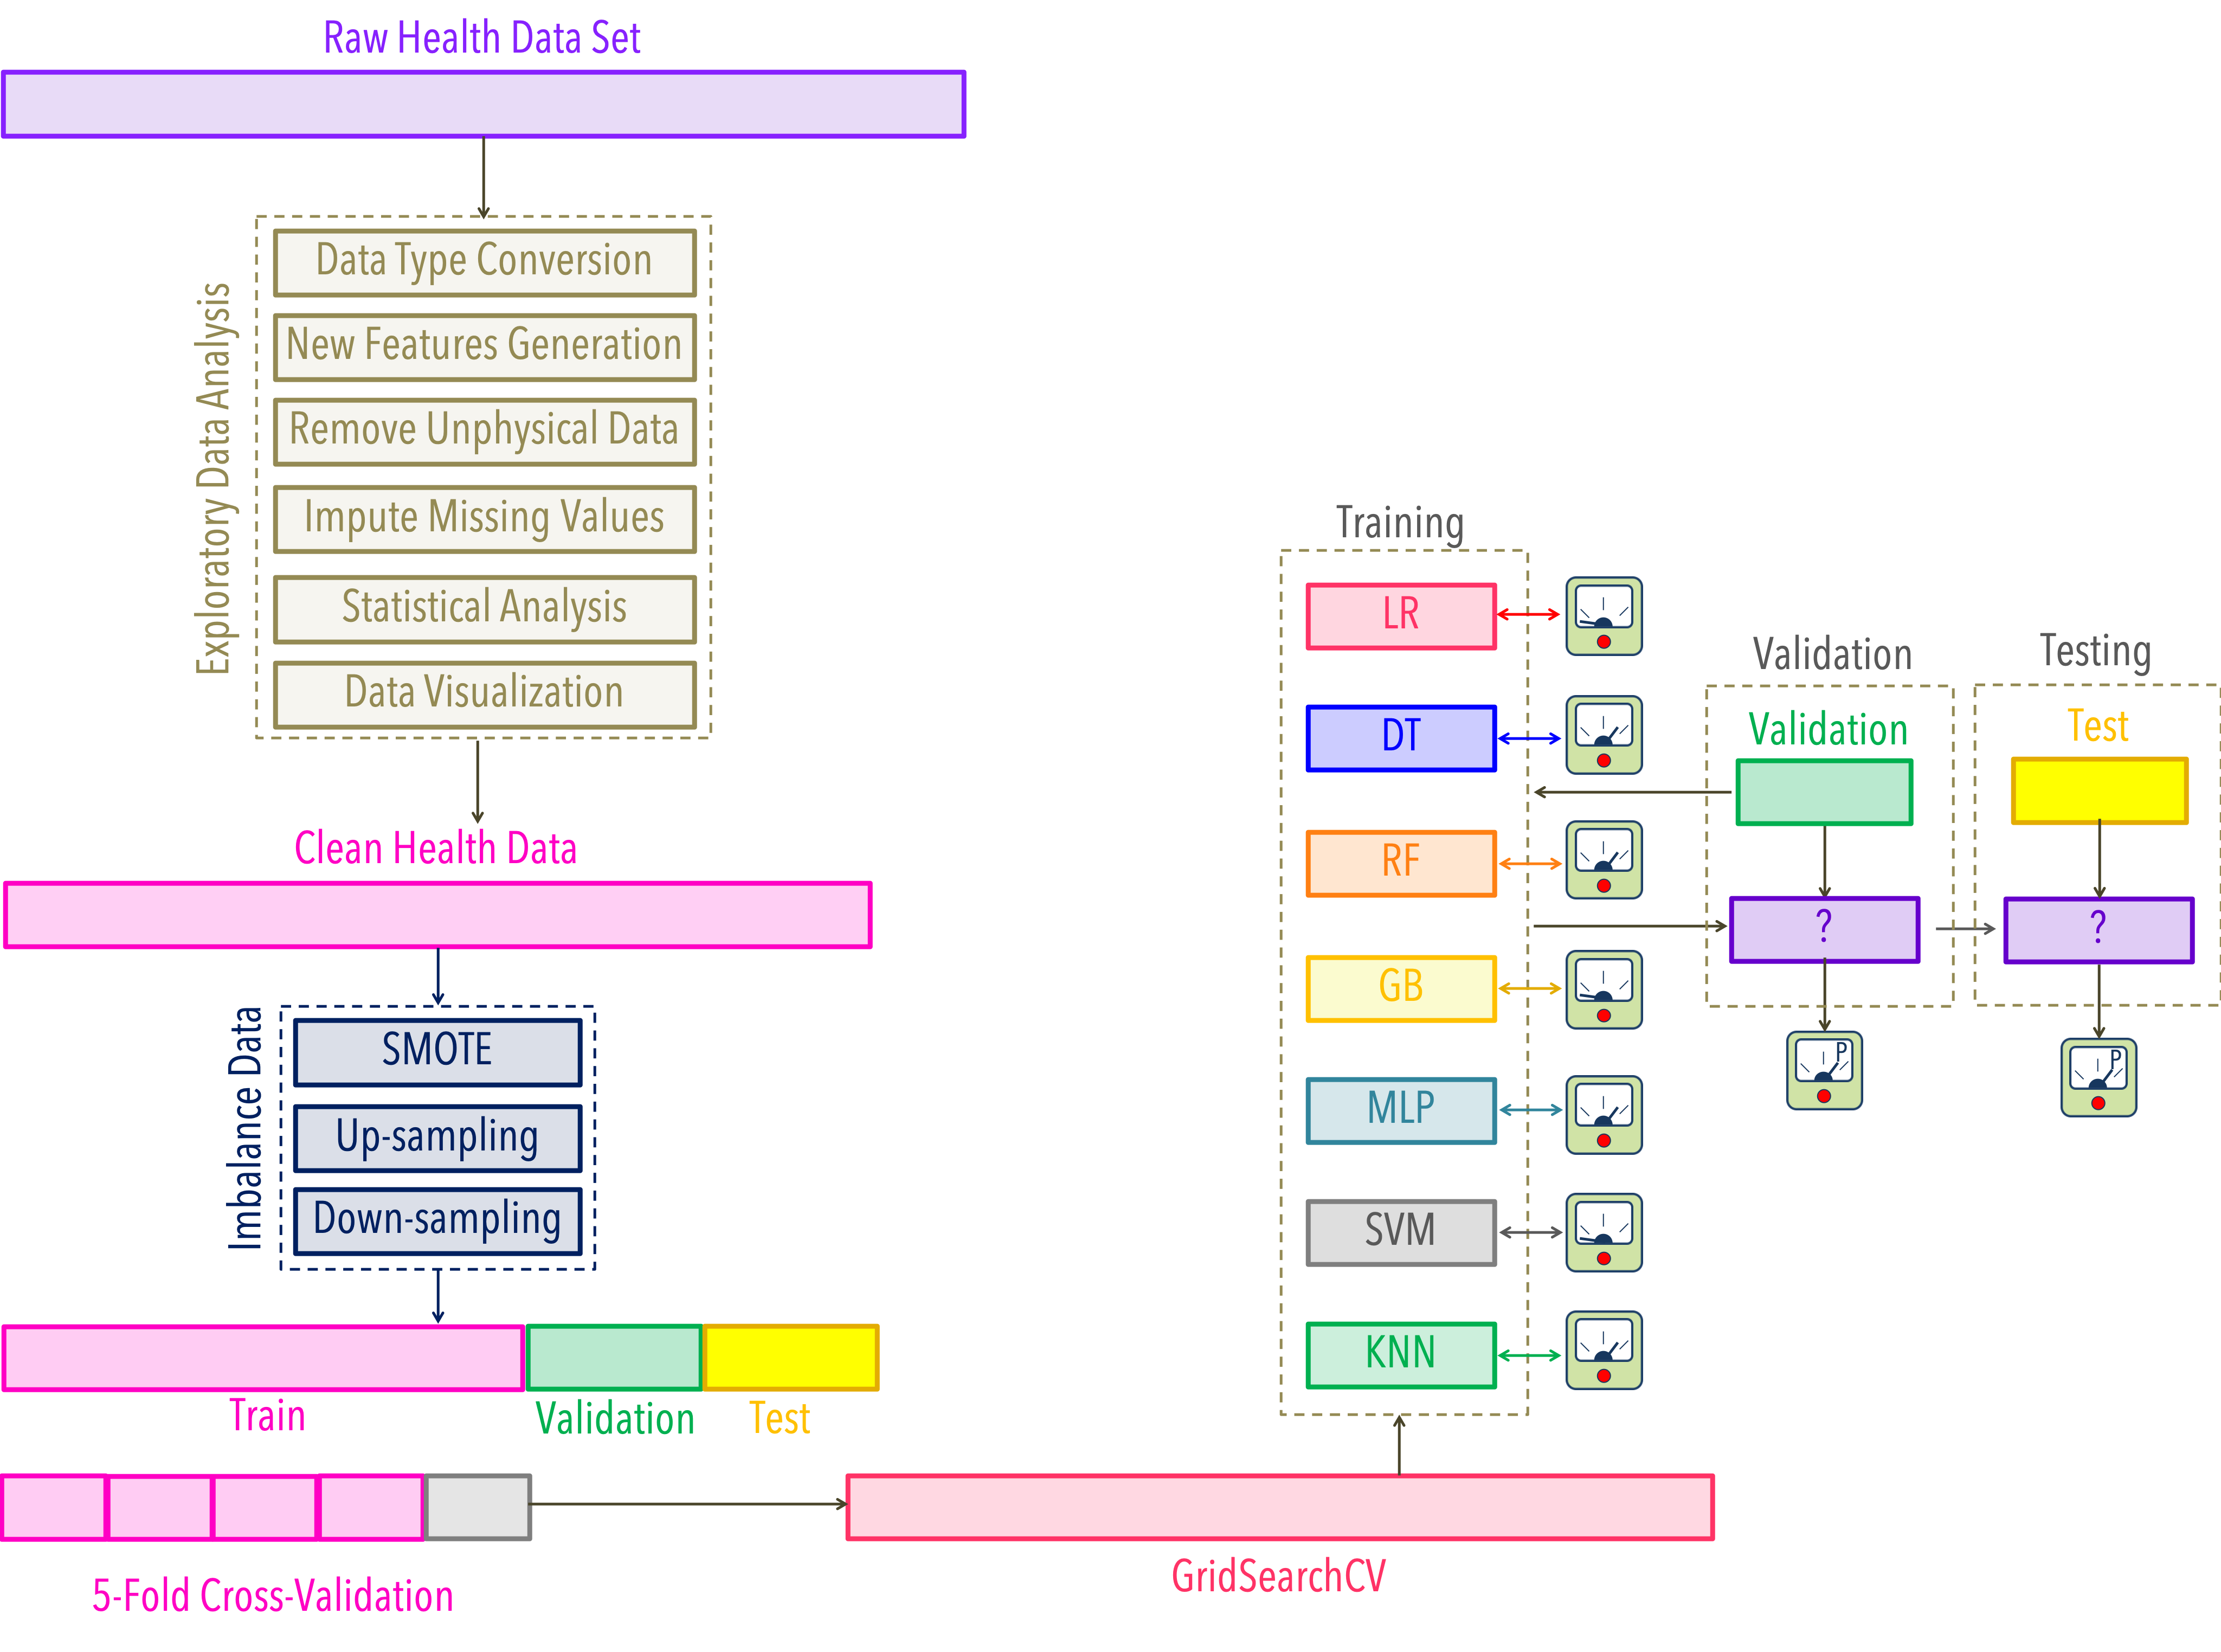

In [129]:
from IPython.display import Image
Image("img/overview.png")

# 1. Data Importation

The health data contains the wearable data for 241 anonymized users in a period of a few months. The data is save as a pandas dataframe defined as '__df__'. A quick '__info( )__' command returns the details of the columns in the raw data. afterwards, a '__describe( )__' is used to provide a preliminary statistical details of the health data.

In [20]:
#df_data= pd.read_csv(body)
df_data = pd.read_csv('healthdata.csv')

In [21]:
df=df_data
df.head()

,userId,dataDate,steps,activeMinutes,sedentaryMinutes,sleepEfficiency,minutesAsleep,sleepStartTime,wakeTime,restingHeartRate,atmPressure,humidity,SicknessDate,energy,feel
0,31633,2019-03-05 00:00:00.000,4157,228,896,91,286,2019-03-04 22:20:30.000,2019-03-05 03:06:30.000,70.0,NaN,NaN,NaN,NaN,NaN
1,31633,2019-03-06 00:00:00.000,9674,277,710,96,409,2019-03-05 22:22:00.000,2019-03-06 05:11:00.000,71.0,NaN,NaN,NaN,NaN,NaN
2,31633,2019-03-07 00:00:00.000,10799,312,667,95,403,2019-03-06 22:27:00.000,2019-03-07 05:10:00.000,73.0,NaN,NaN,NaN,NaN,NaN
3,31633,2019-03-08 00:00:00.000,10811,369,743,90,293,2019-03-07 22:43:00.000,2019-03-08 03:36:00.000,74.0,1011.0,39.0,NaN,8.0,10.0
4,31633,2019-03-09 00:00:00.000,5819,264,785,97,379,2019-03-08 23:04:00.000,2019-03-09 05:23:00.000,72.0,1013.0,14.0,2019-03-09 17:16:12.097,9.0,10.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22068 entries, 0 to 22067
Data columns (total 15 columns):
userId              22068 non-null int64
dataDate            22068 non-null object
steps               22068 non-null int64
activeMinutes       22068 non-null int64
sedentaryMinutes    22068 non-null int64
sleepEfficiency     22068 non-null int64
minutesAsleep       22068 non-null int64
sleepStartTime      22068 non-null object
wakeTime            22068 non-null object
restingHeartRate    22063 non-null float64
atmPressure         12206 non-null float64
humidity            12206 non-null float64
SicknessDate        1416 non-null object
energy              8344 non-null float64
feel                8344 non-null float64
dtypes: float64(5), int64(6), object(4)
memory usage: 2.5+ MB


In [23]:
df.describe()

,userId,steps,activeMinutes,sedentaryMinutes,sleepEfficiency,minutesAsleep,restingHeartRate,atmPressure,humidity,energy,feel
count,22068.000000,22068.000000,22068.000000,22068.000000,22068.000000,22068.000000,22063.000000,12206.000000,12206.000000,8344.000000,8344.000000
mean,9966.568153,8775.801794,266.801976,684.020799,88.804060,395.266812,64.798894,1016.097385,66.135507,7.888663,7.852589
std,5728.082973,5110.894520,116.612384,149.869923,13.608601,114.350214,10.194804,13.827612,22.514180,2.453488,2.679998
min,582.000000,0.000000,0.000000,0.000000,18.000000,20.000000,0.000000,596.000000,4.000000,0.000000,0.000000
25%,6083.000000,5204.750000,189.000000,593.000000,90.000000,328.000000,60.000000,1012.000000,50.000000,7.000000,7.000000
50%,9108.000000,7852.500000,255.000000,685.000000,94.000000,407.000000,65.000000,1017.000000,69.000000,8.000000,8.000000
75%,12377.000000,11313.000000,330.000000,776.000000,96.000000,470.000000,70.000000,1023.000000,85.000000,10.000000,10.000000
max,31633.000000,47619.000000,1440.000000,1394.000000,100.000000,977.000000,98.000000,1046.000000,107.000000,10.000000,10.000000


# 2. Exploraotry Data Analysis (EDA)

## 2.1 Data Conversion

1. As can be seen, our dataframe contains four objects to represent the date/time of an entry. This includes __(1) dataDate__, __(2) sleepStartTime__, __(3) wakeTime__ and __(4) SicknessDate__. We need to convert them to pandas datetime.


2. __SicknessDate__: It contains information on whether a person felt sick or not sick on that particular date. An entry at this column represents that a user felt __sick__. In contrast, we assume whenever this column does not have any entry the user was __notsick__. This column is our __Target Variable__. In order to further analyse, we convert the entry of this column as numerical values as '__1__' or '__0__', respectively representing '__sick__' and '__notsick__'.


3. '__dataDate__': We construct a new feature '__weekend__' to represents whether the data is recorded during weekend ('1') or weekdays ('0').


4. '__sleepStartTime__': We convert the sleep start time to the hour of the day to extract the bed timing pattarn of a user.


5. '__wakeTime__': We convert the wake time to the hour of the day to extract the wake timing pattarn of a user.

### Target Variable Preparation: Converting Sickness/Not Sickness to Numerical Value (1/0)

In [24]:
# Converting Sick=1 and Not Sick =1 
df_illness=df['SicknessDate'].notnull().astype('int')
df = df.assign(SicknessDate=df_illness)
# Renaming the 'SicknessDate' to 'Sick'
df.rename({'SicknessDate': 'Sick'}, axis=1, inplace=True)

### Converting Date Objects to Datetime 

In [25]:
df['dataDate'] = pd.to_datetime(df['dataDate'])
df['sleepStartTime'] = pd.to_datetime(df['sleepStartTime'])
df['wakeTime'] = pd.to_datetime(df['wakeTime'])

### Creating New Features from the data entry date, sleep-start and wake-up times

In [26]:
# df['dayofweek'] contains numerical values to represent a particular day in the week. 
# For example, 0 refers to Monday, 5 refers to Saturday.
# df['weekend'] contains either 1 (for the data recorded in a weekend) or 0 (for the data recorded on a weekday)

df['dayofweek'] = df['dataDate'].dt.dayofweek
df['weekend']=df['dayofweek'].apply(lambda x: 1 if (x>4)  else 0)

# df['sleep_hour'] contains numerical values representing the hour of the day (0-24) when the user started their sleep.
# df['wake_hour'] contains numerical values representing the hour of the day (0-24) when the user woke up from sleep.

df['sleep_hour']=df.sleepStartTime.dt.hour
df['wake_hour']=df.wakeTime.dt.hour

## 2.2 Extraction of New Features

1. We now construct another feature called __penalty__ refering to an integer number that represent how well an individual user follows his/her generic sleeping schedule. For this analysis, we need to construct four other feautres named __sleephourmode__ & __sleep_penalty__ and __wakehourmode__ & __wake_penalty__'.


2. __sleephourmode__ is computed _via_ __df_sleephour__  for each individual user and represents __MODE of sleep start hour__.


3. __wakehourmode__ is computed _via_ __df_wakephour__  for each individual user and represents __MODE of wake hour__.


4. __sleep_penalty__ captures how much an individual deviates from his/her mode of sleep-start hour. It can be '0' (exact timing), '+ve' (early sleeper) or '-ve' (late sleeper).


5. __wake_penalty__ captures how much an individual deviates from his/her mode of wake-up hour. It can be '0' (exact timing), '+ve' (late waking) or '-ve' (early waking).


6. __penalty__:  Finally, the penalty term is computed by adding both _sleep_penalty_ and _wake_penalty_.


7. For our computation we segment the __penalty__ term into three categories, namely, '__perfect__' sleep (penalty ==0), '__excess__' sleep' and __less__' sleep. We use __one-hot encoding__ to create three more features to represent whether an entry delineates perfect, excess or less sleep.    


8. __bedtime__: Bed time plays an important role in determining sleep efficiency. The sleep efficiency is the ratio of the total time spent asleep (minutesAsleep) compared to the total amount of time spent in bed (bedtime). Therefore, we calculate bed time (and create another feature '__bedtime__') as (total time spent asleep/sleep efficiency).


9. __sleepLatency__: We defined sleep latency as the time a person spends in bed before and after the actual sleep. It is represented by __sleepLatency__ and computed as the difference between bedtime and minutesAsleep.

### Individual Sleep Pattern: Calculations of Mode of Sleep Start Hour and Wake-Up Hour

In [27]:
df_sleephour = df.groupby(['userId'])['sleep_hour'].apply(lambda x: x.value_counts().index[0]).reset_index()
df_sleephour.rename(columns={'sleep_hour':'sleephourmode'}, inplace=True)
df_wakehour = df.groupby(['userId'])['wake_hour'].apply(lambda x: x.value_counts().index[0]).reset_index()
df_wakehour.rename(columns={'wake_hour':'wakehourmode'}, inplace=True)
df=pd.merge(df, df_sleephour, how='outer', on='userId').merge(df_wakehour, how='outer', on='userId')

### Individual Sleep Pattern: Calculation of Penalty Term due to Excess or Lack of Sleeping

In [28]:
df['sleep_penalty']=(df['sleephourmode']-df['sleep_hour'])
df['wake_penalty']=(df['wake_hour']-df['wakehourmode'])
df['sleep_penalty']=df['sleep_penalty'].apply(lambda x: x-24 if (x>12) else (x+24 if (x<-12) else x))
df['wake_penalty']=df['wake_penalty'].apply(lambda x: x-24 if (x>12) else (x+24 if (x<-12) else x))
df['penalty']=df['sleep_penalty']+df['wake_penalty']

### Individual Sleep Pattern: One-Hot Encoding of Penalty Term for Three Groups

In [29]:
df['sleepfactor']=df['penalty'].apply(lambda x: 'perfect' if (x==0) else ('less' if (x<0) else 'excess'))
df=pd.concat([df,pd.get_dummies(df['sleepfactor'])], axis=1)

### Feature Extraction: Bed Time and Sleep Latency

In [30]:
# bedtime: Total time spent in bed (awake + asleep)
df['bedtime']=100*df['minutesAsleep']/df['sleepEfficiency']
# sleepLatency: Total time spent in bed awake (or before and after sleeping)
df['sleepLatency']=df['bedtime']-df['minutesAsleep']

### Data Removal

We need to remove the following columns for which we already have extracted the features:
1. __dataDate__
2. __sleepStartTime__
3. __wakeTime__
4. __sleephourmode__
5. __wakehourmode__

In [31]:
df.drop(["dataDate"],1, inplace=True)
df.drop(["sleepStartTime"], 1, inplace=True)
df.drop(["wakeTime"], 1, inplace=True)
df.drop(["sleephourmode"], 1, inplace=True)
df.drop(["wakehourmode"], 1, inplace=True)

## 2.3 Data Analysis: Removing Unrealistic Values and Imputation of Missing Values

1. Next, we divide the dataframe into two separate dataframes depending on __sick/not sick__ (value from Column __Sick__) for further data analysis. Let us call them '__df_sick__' (when '__Sick = 1__') and '__df_notsick__' (when '__Sick = 0__').


2. By analysing the statistical properties of the dataframes __df_sick__ (when __Sick = 1__) and __df_notsick__ (when __Sick = 0__), we can further clean our data on the basis of a few criteria. These criteria are:
    
    a. The sum of total active time, total sedentary time and total time asleep in a given row can not exceed 1440 minutes (total minutes in 24-hour period). In regard to our dataset, this mean: __activeMinutes + sedentaryMinutes + minutesAsleep <= 1440__.
    
    b. The range of atmospheric pressure (atmPressure) should be in 640 -1042 millibar. The upper and lower limits of the atmPressure can be justified from the respective atmospheric pressures of the lowest and highest altitude cities in the world (respectively, Jericho and La Paz). This mean: __640 millibar <= atmPressure <= 1042 millibar__.
    
    c. The maximum humidity of the air in percentage is 100%, meaning __humidity <= 100__.
    
    d. It is unphysical to have resting heart rate (restingHeartRate) equals to zero. Hence, __restingHeartRate > 0__.
    
    
3. After removing the data with unphysical or erroneous values, we can check the amount of __NULL__ in the __Sick = 1__ dataframe. We can see all the columns but __energy__ and __feel__ have 100% non-NULL values. Since, both energy and feel can be potential indicators of sickness, it is important to replace the null values with the corresponding average values for the respective sets of __Sick__ or __Notsick__ data.

### Splitting the Dataframe into Sick=1 and Sick=0 (Not Sick)

In [32]:
# Dataframe with Sick = 1
df_sick=df[df['Sick']>0]
# Dataframe with Sick = 0
df_notsick=df[df['Sick']<1]

### Dataframe with Sick = 1 

In [33]:
# select only the rows where total time in minutes <= 1440
df_sick = df_sick[df_sick['activeMinutes']+df_sick['sedentaryMinutes']+df_sick['minutesAsleep'] <=1440]
df_sick = df_sick.reset_index(drop=True)
# select only the rows where atmospheric pressure is in between 640 -1042 millibar
df_sick = df_sick[df_sick['atmPressure'] <=1042]
df_sick = df_sick.reset_index(drop=True)
df_sick = df_sick[df_sick['atmPressure'] >=640]
df_sick = df_sick.reset_index(drop=True)
# select only the rows where humidity is in between 0-100%
df_sick = df_sick[df_sick['humidity'] <=100]
df_sick = df_sick.reset_index(drop=True)
# select only the rows where restinh heart rate > 0
df_sick = df_sick[df_sick['restingHeartRate'] >0]
df_sick = df_sick.reset_index(drop=True)

In [34]:
# Checking the number of NULL values in each columns of Sick data
df_sick.isnull().sum()

userId                0
steps                 0
activeMinutes         0
sedentaryMinutes      0
sleepEfficiency       0
minutesAsleep         0
restingHeartRate      0
atmPressure           0
humidity              0
Sick                  0
energy              385
feel                385
dayofweek             0
weekend               0
sleep_hour            0
wake_hour             0
sleep_penalty         0
wake_penalty          0
penalty               0
sleepfactor           0
excess                0
less                  0
perfect               0
bedtime               0
sleepLatency          0
dtype: int64

In [35]:
# Imputation of missing values in energy and feel columns by statistical mean
avg_feel_sick = df_sick["feel"].astype("float").mean(axis=0)
avg_energy_sick = df_sick["energy"].astype("float").mean(axis=0)
print(avg_feel_sick)
print(avg_energy_sick)
df_sick["feel"].replace(np.nan, avg_feel_sick, inplace=True)
df_sick["energy"].replace(np.nan, avg_energy_sick, inplace=True)

6.042424242424242
6.570909090909091


In [36]:
df_sick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 25 columns):
userId              1210 non-null int64
steps               1210 non-null int64
activeMinutes       1210 non-null int64
sedentaryMinutes    1210 non-null int64
sleepEfficiency     1210 non-null int64
minutesAsleep       1210 non-null int64
restingHeartRate    1210 non-null float64
atmPressure         1210 non-null float64
humidity            1210 non-null float64
Sick                1210 non-null int64
energy              1210 non-null float64
feel                1210 non-null float64
dayofweek           1210 non-null int64
weekend             1210 non-null int64
sleep_hour          1210 non-null int64
wake_hour           1210 non-null int64
sleep_penalty       1210 non-null int64
wake_penalty        1210 non-null int64
penalty             1210 non-null int64
sleepfactor         1210 non-null object
excess              1210 non-null uint8
less                1210 non-null uint8
pe

### Dataframe Sick = 0 

In [37]:
# select only the rows where total time in minutes <= 1440
df_notsick = df_notsick[df_notsick['activeMinutes']+df_notsick['sedentaryMinutes']+df_notsick['minutesAsleep'] <=1440]
df_notsick = df_notsick.reset_index(drop=True)
# select only the rows where atmospheric pressure is in between 640 -1042 millibar
df_notsick = df_notsick[df_notsick['atmPressure'] <=1042]
df_notsick = df_notsick.reset_index(drop=True)
df_notsick = df_notsick[df_notsick['atmPressure'] >=640]
df_notsick = df_notsick.reset_index(drop=True)
# select only the rows where humidity is in between 0-100%
df_notsick = df_notsick[df_notsick['humidity'] <=100]
df_notsick = df_notsick.reset_index(drop=True)
# select only the rows where restinh heart rate > 0
df_notsick = df_notsick[df_notsick['restingHeartRate'] >0]
df_notsick = df_notsick.reset_index(drop=True)

In [38]:
# Imputation of missing values in energy and feel columns by statistical mean
df_notsick.isnull().sum()

userId                 0
steps                  0
activeMinutes          0
sedentaryMinutes       0
sleepEfficiency        0
minutesAsleep          0
restingHeartRate       0
atmPressure            0
humidity               0
Sick                   0
energy              4177
feel                4177
dayofweek              0
weekend                0
sleep_hour             0
wake_hour              0
sleep_penalty          0
wake_penalty           0
penalty                0
sleepfactor            0
excess                 0
less                   0
perfect                0
bedtime                0
sleepLatency           0
dtype: int64

In [39]:
# Imputation of missing values in energy and feel columns by statistical mean
avg_feel_notsick = df_notsick["feel"].astype("float").mean(axis=0)
avg_energy_notsick = df_notsick["energy"].astype("float").mean(axis=0)
print(avg_feel_notsick)
print(avg_energy_notsick)
df_notsick["feel"].replace(np.nan, avg_feel_notsick, inplace=True)
df_notsick["energy"].replace(np.nan, avg_energy_notsick, inplace=True)

8.07577358490566
8.071849056603774


In [40]:
df_notsick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10802 entries, 0 to 10801
Data columns (total 25 columns):
userId              10802 non-null int64
steps               10802 non-null int64
activeMinutes       10802 non-null int64
sedentaryMinutes    10802 non-null int64
sleepEfficiency     10802 non-null int64
minutesAsleep       10802 non-null int64
restingHeartRate    10802 non-null float64
atmPressure         10802 non-null float64
humidity            10802 non-null float64
Sick                10802 non-null int64
energy              10802 non-null float64
feel                10802 non-null float64
dayofweek           10802 non-null int64
weekend             10802 non-null int64
sleep_hour          10802 non-null int64
wake_hour           10802 non-null int64
sleep_penalty       10802 non-null int64
wake_penalty        10802 non-null int64
penalty             10802 non-null int64
sleepfactor         10802 non-null object
excess              10802 non-null uint8
less               

# 2.4 Data Visualization

## 2.4.1 Visualization of Time Spent in Various Activities

### Distribution of total daily time in various activities

1. First, we can check the amount of total time users spent in three activities, namely, walking/running (__activeMinutes__), sitting/laying (__sedentaryMinutes__) and sleeping (__minutesAsleep__) categorized in terms of users feeling __Sick__ or __Notsick__. The respective statistical mean of each activity in each category is also calculated. Note that the outliers are also visible and determined as data points out of the range of _Q1-1.5IQR_ and _Q3+1.5IQR_. Here _Q1_ and _Q3_) are respectively the first 1st and 3rd quartile and _IQR_ is the _interquartile range_. 


2. We can easily identify some of the data points that make less or no realistic sense. For example, for sick = 1 data, some of data shows zero or nearly zero sedentary time, meaning that user spent the day either sleeping or walking/running, which does not make sense. Same is true for data when sick = 0. Similarly, a person should not have sedentary time very high (close to 21-22 hour!) as it means less amount of time for sleeping and walking/running activity and appears unrealistic. __So we remove the outliers in sedentary minutes for both sick = 1 and sick = 0 datasets__.


3. Importantly, the data for minute asleep  needs to be considered carefully. For example, a person feeling _not sick_ should not have close to zero minutes as sleeping time. Thus, this constituets an outlier for sick = 0 data. However, it is entirely possible that a person who is feeling sick does not have sleep at all at a particular day. Hence, we can keep those values in regard to Sick =1 data as both lack of sleep and too much of sleep can be an ingredient for feeling sick. __So we only remove the outliers in minutes asleep for sick = 0 dataset__.


4. For total activity time during a day, a value in 550 - 750 mins range refers to 9-12.5 hours of activity. This might be true for athletes with sick = 0. But we assume, it is highly unlikely that the dataset contains significant amount of athlates as users and consider this as an outlier for dataset sick = 0. However, a person with excessive activity can feel sick and we keep those outliers for sick = 1 dataset. __So we only remove the outliers in activite minute for sick = 0 dataset__.


5. It is hard to differentiate a sick day and a notsick day in terms of number of daily steps. It might be due to the large numbers of steps as identified by outliers. Let us see whether it is helpful to remove the outliers.  


In [41]:
# Data frames for Visualization
frames = [df_sick, df_notsick]
allData = pd.concat(frames)

Average daily active minutes for the users feeling sick:  259.93  min
Average daily sedentary minutes for the users feeling sick:  684  min
Average daily minutes asleep for the users feeling sick:  392  min


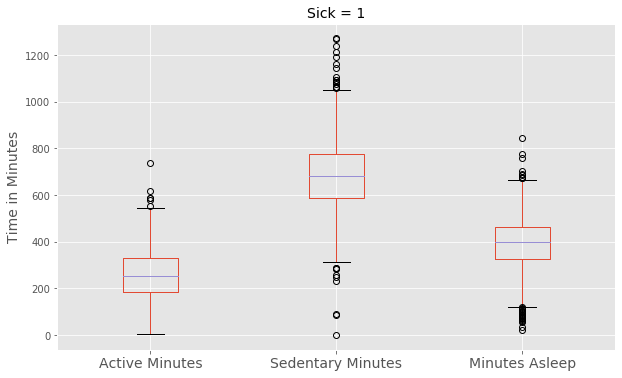

In [42]:
# Sick
event=['','Active Minutes','Sedentary Minutes','Minutes Asleep']
fig = plt.figure(figsize = (10,6))
ax = df_sick.boxplot(column = ['activeMinutes','sedentaryMinutes','minutesAsleep'])
ax.set_xticklabels(event[1:],fontsize=14)
plt.ylabel('Time in Minutes',fontsize=14)
plt.title('Sick = 1',fontsize=14);
print('Average daily active minutes for the users feeling sick: ',round(df_sick['activeMinutes'].mean(),2),' min')
print('Average daily sedentary minutes for the users feeling sick: ',round(df_sick['sedentaryMinutes'].mean()),' min')
print('Average daily minutes asleep for the users feeling sick: ',round(df_sick['minutesAsleep'].mean()),' min')

Average daily active minutes for the users feeling not sick:  268.71  min
Average daily sedentary minutes for the users feeling not sick:  684  min
Average daily minutes asleep for the users feeling not sick:  394  min


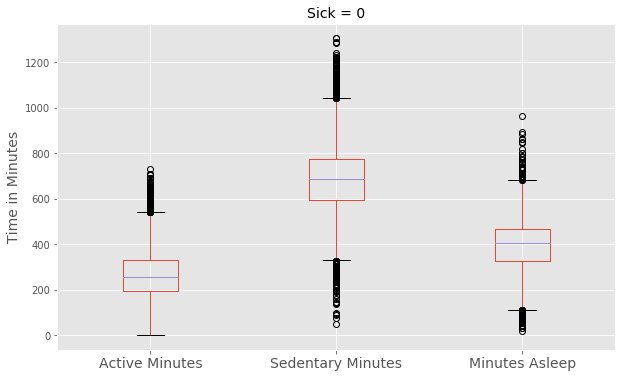

In [43]:
# Notsick
event=['','Active Minutes','Sedentary Minutes','Minutes Asleep']
fig = plt.figure(figsize = (10,6))
ax = df_notsick.boxplot(column = ['activeMinutes','sedentaryMinutes','minutesAsleep'])
ax.set_xticklabels(event[1:],fontsize=14)
plt.ylabel('Time in Minutes',fontsize=14)
plt.title('Sick = 0',fontsize=14);
print('Average daily active minutes for the users feeling not sick: ',round(df_notsick['activeMinutes'].mean(),2),' min')
print('Average daily sedentary minutes for the users feeling not sick: ',round(df_notsick['sedentaryMinutes'].mean()),' min')
print('Average daily minutes asleep for the users feeling not sick: ',round(df_notsick['minutesAsleep'].mean()),' min')

Average daily steps for the users feeling not sick:  8771.67
Average daily steps for the users feeling sick:  8712.56


<Figure size 1440x720 with 0 Axes>

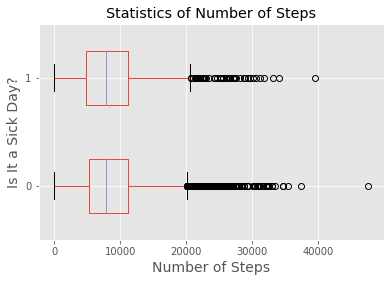

In [49]:
# Steps
fig = plt.figure(figsize = (20,10))
allData.boxplot(column = 'steps', by = 'Sick', vert = False, widths = 0.5)
plt.xlabel('Number of Steps',fontsize=14)
plt.ylabel('Is It a Sick Day?',fontsize=14)
plt.suptitle('')
plt.title('Statistics of Number of Steps');

print('Average daily steps for the users feeling not sick: ',round(df_notsick['steps'].mean(),2))
print('Average daily steps for the users feeling sick: ',round(df_sick['steps'].mean(),2))


### Analysis depending on day of the week and weekend/weekdays

To explore more, we also have raised the question: is there any dependency on how a user spends
his time as a function of the day of the week(dayofweek) or weekend/weekdays (weekend)? The following figures provide the insightful visualizations in this regard. The trends for __Sick = 1__ dataset  include:
1. The daily portion of active minutes goes high and reaches the maximum on Thursday to Friday. Then it reduces and reaches its minimum on Sunday.


2. Interestingly, the amount of sedentary minutes starts from a high value on Monday and gradually declines as the week reaches toward its end.


3. The amount of minutes asleep follows the opposite trend of sedentary minutes as it increases from Monday ! Sunday, where Sunday marks the maximum of daily minutes asleep.


However, the similar trends for users who did not feel sick or __Sick = 0__ are somewhat different with no monotonically rising pattern in minutes asleep or decreasing pattern in the amount of sedentary minutes. Also the amount of active time reaches its peak on Friday-Saturday.

As we mentioned before, it is hard to differentiate __Sick = 1__ and __Sick = 0__ in terms of the number of daily steps taken by a user. However, we can extract a clear difference in the statistics of the number of steps
taken by two of the classes considered in this study if we illustrate the trends as a function of the
day of the week. In the case of users in class __Sick = 1__, the number of steps taken shows high variation and reaches its peak on Thursday-Friday, whereas the users in class __Sick = 0__ exhibits less variation in the number of steps. The higher degree of variations in the number of steps taken by users feeling sick is also found to be consistent in the statistics as a function of weekend/weekday.

In [50]:
# Data frames for visualization
# grouping sick data by day of the week
dayGroupedData_sick = df_sick.groupby(['dayofweek']).mean()
# grouping notsick data by day of the week
dayGroupedData_notsick = df_notsick.groupby(['dayofweek']).mean()
# grouping sick data by day of the weekend/weekdays
weekGroupedData_sick = df_sick.groupby(['weekend']).mean()
# grouping sick data by day of the weekend/weekdays
weekGroupedData_notsick = df_notsick.groupby(['weekend']).mean()
dayCodes = ['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
minDayCodes = ['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
days = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
WeekendCodes = ['', 'Weekday', 'Weekend']
weekends = {0: 'Weekday', 1: 'Weekend'}

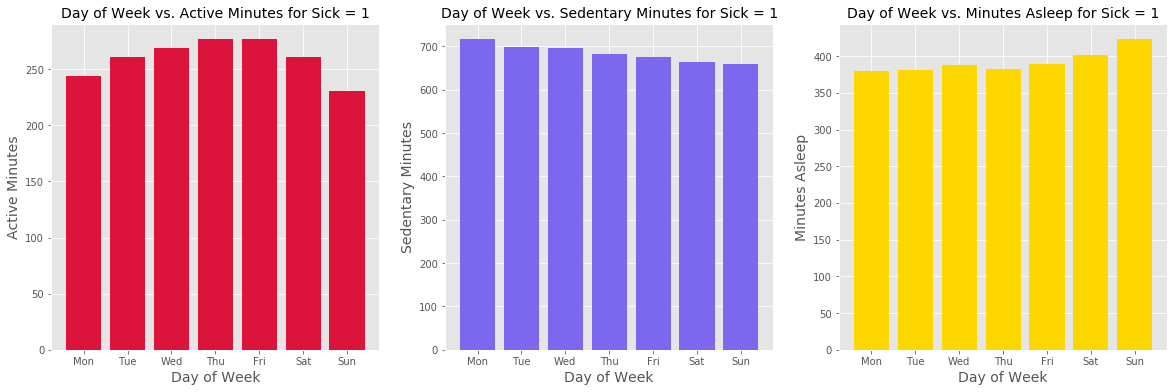

In [51]:
#Sick
fig = plt.figure(figsize = (20,6))
#############

ax = plt.subplot(131)  
plt.bar(dayGroupedData_sick.index, dayGroupedData_sick['activeMinutes'], color='crimson')
plt.title('Day of Week vs. Active Minutes for Sick = 1', fontsize=14)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Active Minutes', fontsize=14)
ax.set_xticklabels(minDayCodes)

#############

ax2 = fig.add_subplot(132)
plt.bar(dayGroupedData_sick.index, dayGroupedData_sick['sedentaryMinutes'], color='mediumslateblue')
plt.title('Day of Week vs. Sedentary Minutes for Sick = 1', fontsize=14)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Sedentary Minutes', fontsize=14)
ax2.set_xticklabels(minDayCodes)

#############

ax3 = fig.add_subplot(133)
ax3.set_xticklabels(minDayCodes)
plt.bar(dayGroupedData_sick.index, dayGroupedData_sick['minutesAsleep'], color='gold')
plt.title('Day of Week vs. Minutes Asleep for Sick = 1', fontsize=14)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Minutes Asleep', fontsize=14)
plt.show()

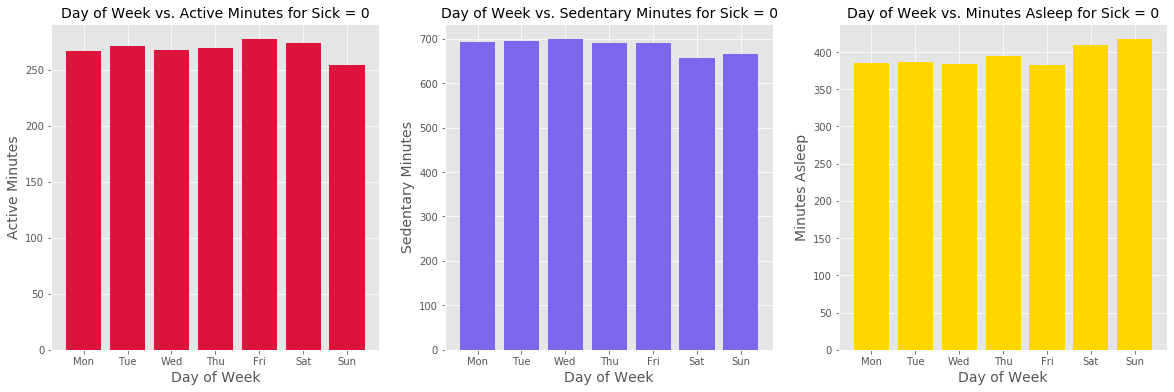

In [52]:
# Notsick
fig = plt.figure(figsize = (20,6))
#############
ax = plt.subplot(131)  
plt.bar(dayGroupedData_notsick.index, dayGroupedData_notsick['activeMinutes'], color='crimson')
plt.title('Day of Week vs. Active Minutes for Sick = 0', fontsize=14)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Active Minutes', fontsize=14)
ax.set_xticklabels(minDayCodes)

#############

ax2 = fig.add_subplot(132)
plt.bar(dayGroupedData_notsick.index, dayGroupedData_notsick['sedentaryMinutes'], color='mediumslateblue')
plt.title('Day of Week vs. Sedentary Minutes for Sick = 0', fontsize=14)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Sedentary Minutes', fontsize=14)
ax2.set_xticklabels(minDayCodes)

#############

ax3 = fig.add_subplot(133)
ax3.set_xticklabels(minDayCodes)
plt.bar(dayGroupedData_notsick.index, dayGroupedData_notsick['minutesAsleep'], color='gold')
plt.title('Day of Week vs. Minutes Asleep for Sick = 0', fontsize=14)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Minutes Asleep', fontsize=14)
plt.show()

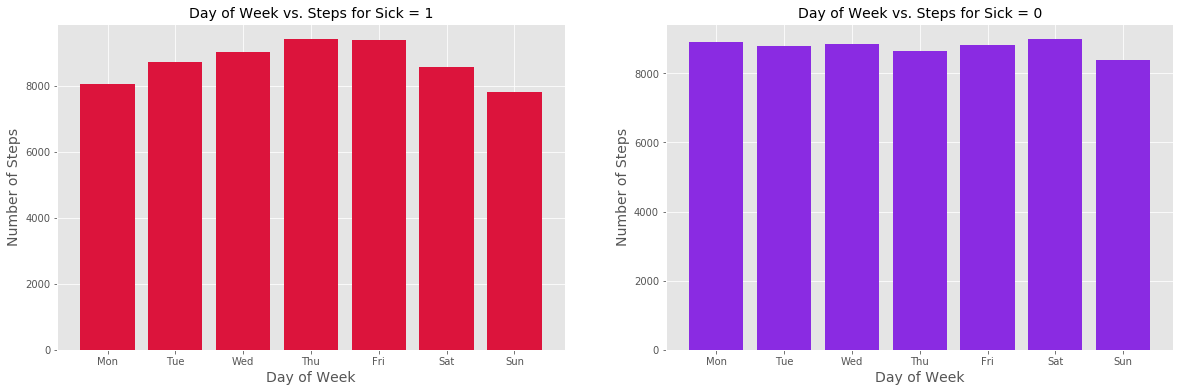

In [53]:
fig = plt.figure(figsize = (20,6))

#Sick
ax = plt.subplot(121)  
plt.bar(dayGroupedData_sick.index, dayGroupedData_sick['steps'], color='crimson')
plt.title('Day of Week vs. Steps for Sick = 1', fontsize=14)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Steps', fontsize=14)
ax.set_xticklabels(minDayCodes)

#Notsick
ax = plt.subplot(122)  
plt.bar(dayGroupedData_notsick.index, dayGroupedData_notsick['steps'], color='blueviolet')
plt.title('Day of Week vs. Steps for Sick = 0', fontsize=14)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Steps', fontsize=14)
ax.set_xticklabels(minDayCodes)
plt.show()

<Figure size 720x432 with 0 Axes>

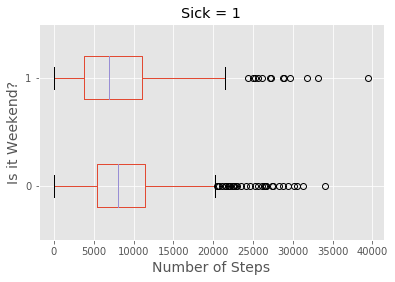

In [54]:
# Sick
fig = plt.figure(figsize = (10,6))
df_sick.boxplot(column = 'steps', by = 'weekend', vert = False, widths = 0.4)
plt.xlabel('Number of Steps',fontsize=14)
plt.ylabel('Is it Weekend?',fontsize=14)
plt.suptitle('')
plt.title('Sick = 1');

<Figure size 720x432 with 0 Axes>

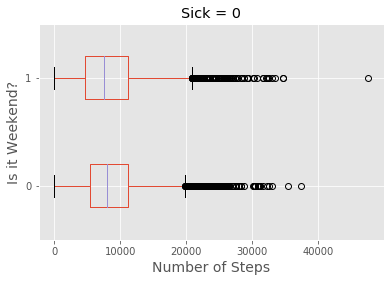

In [55]:
#Not sick
fig = plt.figure(figsize = (10,6))
df_notsick.boxplot(column = 'steps', by = 'weekend', vert = False, widths = 0.4)
plt.xlabel('Number of Steps',fontsize=14)
plt.ylabel('Is it Weekend?',fontsize=14)
plt.suptitle('')
plt.title('Sick = 0');

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


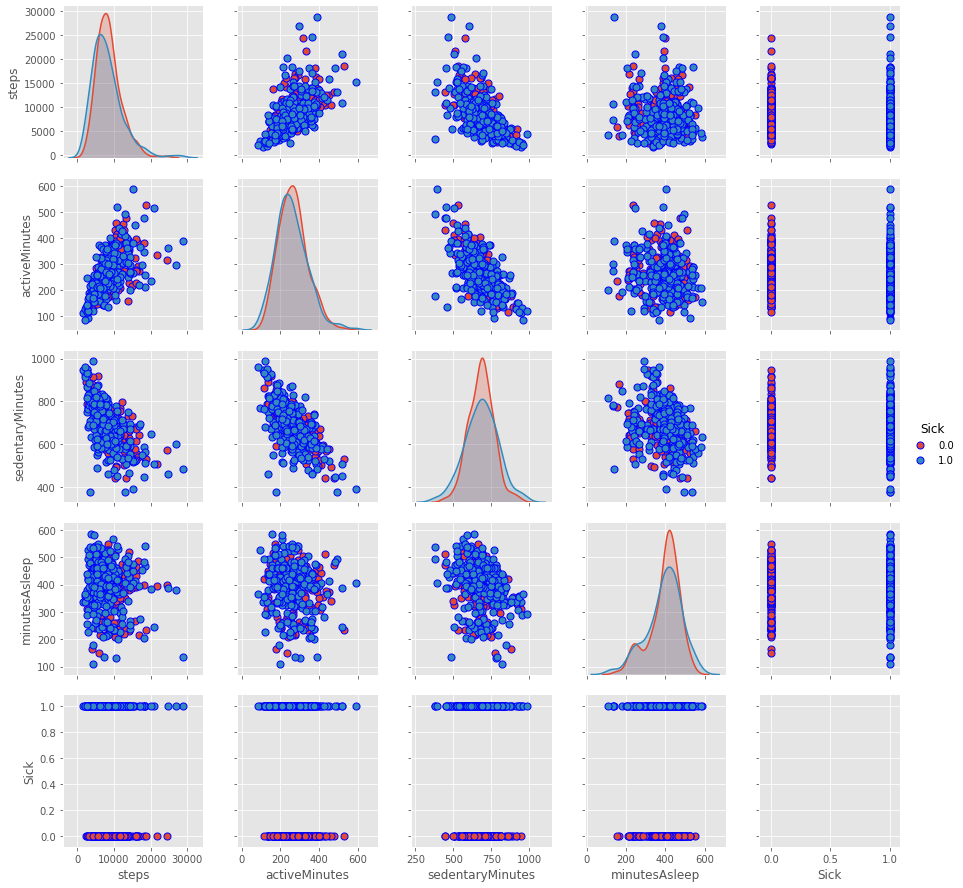

In [56]:
# Corrleation
# Sick day parameters grouped by individual users
df_user_sick=df_sick.groupby(['userId']).mean()
# Not sick day parameters grouped by individual users
df_user_notsick=df_notsick.groupby(['userId']).mean()
frames = [df_user_sick, df_user_notsick]
userGroupedData = pd.concat(frames)

df_active=userGroupedData[['steps','activeMinutes','sedentaryMinutes','minutesAsleep', 'Sick']]
sns.pairplot(df_active, hue='Sick',kind="scatter", markers="o", plot_kws=dict(s=50, edgecolor="b", linewidth=1))
plt.show()

### Removing Outliers

In [57]:
# Steps
# Removing the outliers for Sick = 1
Q1_steps=df_sick['steps'].quantile(0.25)
Q3_steps=df_sick['steps'].quantile(0.75)
IQR_steps=Q3_steps-Q1_steps
df_sick = df_sick[df_sick['steps'] <=(Q3_steps + 1.5 * IQR_steps)]
df_sick = df_sick.reset_index(drop=True)
# Removing the outliers for Sick = 0
Q1_steps=df_notsick['steps'].quantile(0.25)
Q3_steps=df_notsick['steps'].quantile(0.75)
IQR_steps=Q3_steps-Q1_steps
df_notsick =df_notsick[(df_notsick['steps']>=(1000))& (df_notsick['steps'] <= (Q3_steps + 1.5 * IQR_steps))]
df_notsick = df_notsick.reset_index(drop=True)

In [58]:
# This may make performance lower
# Sedentary minutes
# Removing the outliers for Sick = 1
Q1_sedentaryMinutes=df_sick['sedentaryMinutes'].quantile(0.25)
Q3_sedentaryMinutes=df_sick['sedentaryMinutes'].quantile(0.75)
IQR_sedentaryMinutes=Q3_sedentaryMinutes-Q1_sedentaryMinutes
df_sick =df_sick[(df_sick['sedentaryMinutes']>=(Q1_sedentaryMinutes - 1.5 * IQR_sedentaryMinutes))& (df_sick['sedentaryMinutes'] <= (Q3_sedentaryMinutes + 1.5 * IQR_sedentaryMinutes))]
df_sick = df_sick.reset_index(drop=True)
# Removing the outliers for Sick = 0
Q1_sedentaryMinutes=df_notsick['sedentaryMinutes'].quantile(0.25)
Q3_sedentaryMinutes=df_notsick['sedentaryMinutes'].quantile(0.75)
IQR_sedentaryMinutes=Q3_sedentaryMinutes-Q1_sedentaryMinutes
df_notsick =df_notsick[(df_notsick['sedentaryMinutes']>=(Q1_sedentaryMinutes - 1.5 * IQR_sedentaryMinutes))& (df_notsick['sedentaryMinutes'] <= (Q3_sedentaryMinutes + 1.5 * IQR_sedentaryMinutes))]
df_notsick = df_notsick.reset_index(drop=True)

In [59]:
# This may make performance lower
# Active minutes
# Removing the outliers for Sick = 1
Q1_activeMinutes=df_notsick['activeMinutes'].quantile(0.25)
Q3_activeMinutes=df_notsick['activeMinutes'].quantile(0.75)
IQR_activeMinutes=Q3_activeMinutes-Q1_activeMinutes
df_notsick = df_notsick[df_notsick['activeMinutes'] <=(Q3_activeMinutes + 1.5 * IQR_activeMinutes)]
df_notsick = df_notsick.reset_index(drop=True)
# Minutes Asleep
# Removing the outliers for Sick = 1
Q1_minutesAsleep=df_notsick['minutesAsleep'].quantile(0.25)
Q3_minutesAsleep=df_notsick['minutesAsleep'].quantile(0.75)
IQR_minutesAsleep=Q3_minutesAsleep-Q1_minutesAsleep
df_notsick =df_notsick[(df_notsick['minutesAsleep']>=(Q1_minutesAsleep - 1.5 * IQR_minutesAsleep))& (df_notsick['minutesAsleep'] <= (Q3_minutesAsleep + 1.5 * IQR_minutesAsleep))]
df_notsick = df_notsick.reset_index(drop=True)

## 2.4.2 Visualization of Sleep Data

In this section, we will visualize intriguing statistics of sleep related data to further comprehend
the health data. 


The following figure exhibits the distributions of the hour of the day when the users with __Sick = 1__ start sleeping (left) and wakes up (right) from the main sleep of the day. For the users in __Sick = 0__ class, the same distributions are shown in the bottom figure panel. It is surprising to see both of the classes follow a similar sleeping pattern and hard to differentiate at this format. However, if we consider our newly developed feature '__penalty__' (the next figure), we can start to see a few key differences in the sleeping pattern between these two classes. For example, the second largest group of users in __Sick = 1__ class received a __penalty__ = -1, meaning
the users in this group have 1 hour of less sleep. Conversely, the the second largest group of users in __Sick = 0__ class received a __penalty__ = +1, indicating the users in this group have tend to have 1 hour of excess sleep. To enhance our comprehension of the sleeping pattern and how much a user deviates from his most common sleeping behaviour, we performed binning of the penalty feature into three categories, namely '__perfect__', '__excess__' and '__less__' sleep (also see Sec. 3.2 for details). The result now becomes more intriguing. For example, the contribution from the constituents of class __Sick = 1__ comes at a descending order of __less > perfect > excess__,
whereas the contribution from the constituents of class __Sick = 0__ comes at a descending order of __excess > perfect > less__. This visualization concludes that the users from __Sick = 1__ class suffers from lack of sleep compared to the users from __Sick = 0__ class.

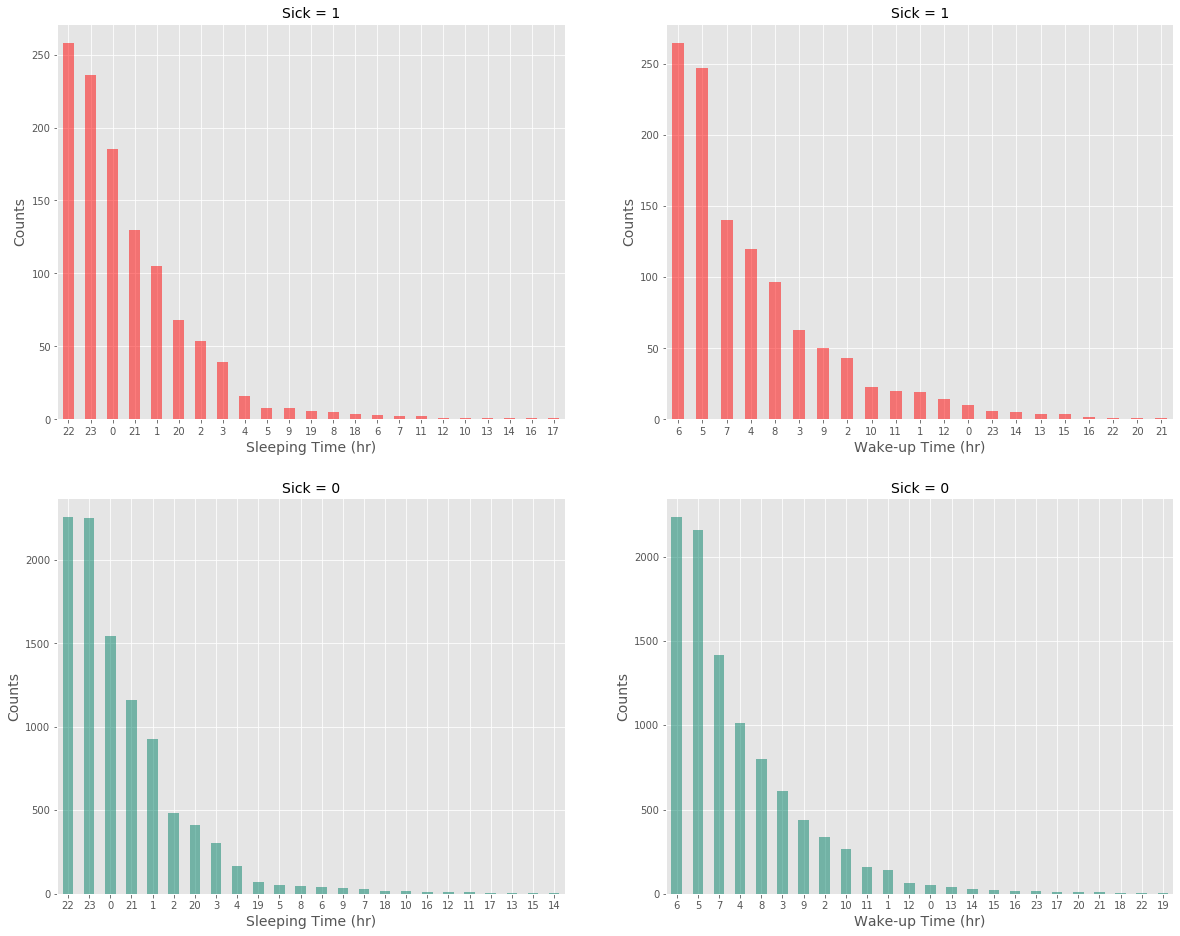

In [61]:
## plot the counts of sleep-start and wake-up hours for sick and notsick datasets
fig = plt.figure(figsize = (20,16))

#############
ax = plt.subplot(221)  
pd.value_counts(df_sick['sleep_hour']).plot.bar(cmap="autumn", alpha=0.5)
plt.xlabel('Sleeping Time (hr)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Sick = 1', fontsize=14)
plt.xticks(rotation=0)

#############

ax = fig.add_subplot(222)
pd.value_counts(df_sick['wake_hour']).plot.bar(cmap="autumn", alpha=0.5)
plt.xlabel('Wake-up Time (hr)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Sick = 1', fontsize=14)
plt.xticks(rotation=0)

#############
ax = fig.add_subplot(223) 
pd.value_counts(df_notsick['sleep_hour']).plot.bar(cmap="summer", alpha=0.5)
plt.xlabel('Sleeping Time (hr)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Sick = 0', fontsize=14)
plt.xticks(rotation=0)

#############

ax = fig.add_subplot(224)
pd.value_counts(df_notsick['wake_hour']).plot.bar(cmap="summer", alpha=0.5)
plt.xlabel('Wake-up Time (hr)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Sick = 0', fontsize=14)
plt.xticks(rotation=0)
plt.show()

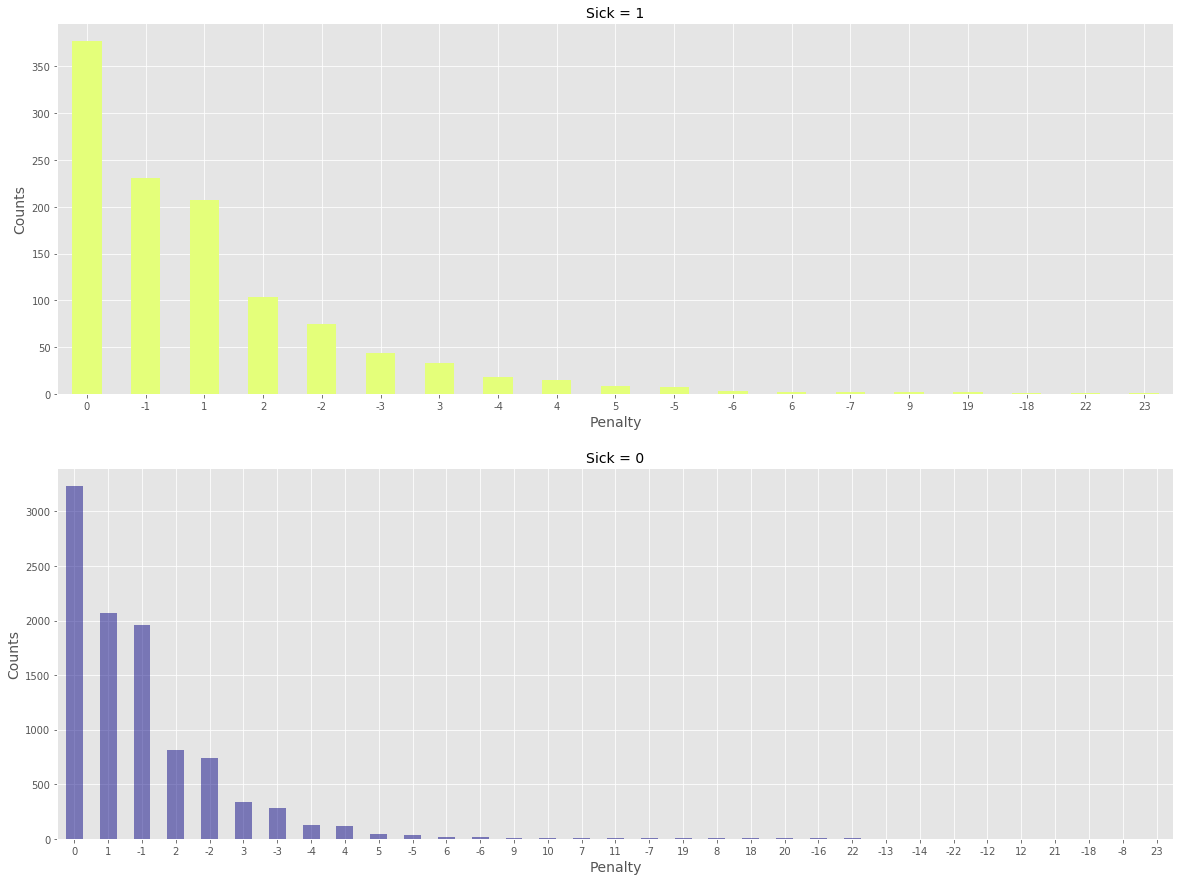

In [62]:
## plot the counts of penalty for sleeping behavior for sick and notsick datasets
# Sick
fig = plt.figure(figsize = (20,15))

ax = plt.subplot(211)  
pd.value_counts(df_sick['penalty']).plot.bar(cmap="Wistia", alpha=1.0)
plt.xlabel('Penalty', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Sick = 1', fontsize=14)
plt.xticks(rotation=0)

#############
# Notick
ax2 = fig.add_subplot(212)
pd.value_counts(df_notsick['penalty']).plot.bar(cmap="plasma", alpha=0.5)
plt.xlabel('Penalty', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Sick = 0', fontsize=14)
plt.xticks(rotation=0)
plt.show()

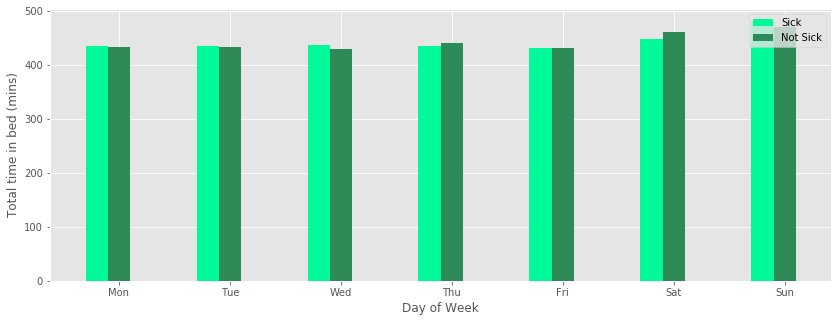

In [63]:
# bedtime: Total time in bed
fig = plt.figure(figsize = (14,5))
plt.bar((dayGroupedData_sick.index), dayGroupedData_sick['bedtime'],width = 0.2, color='mediumspringgreen', label="Sick", tick_label=minDayCodes[1:])
plt.bar((dayGroupedData_notsick.index+0.2), dayGroupedData_notsick['bedtime'],width = 0.2, color='seagreen', label="Not Sick", tick_label=minDayCodes[1:])
plt.xlabel('Day of Week')
plt.ylabel('Total time in bed (mins)')
plt.legend()

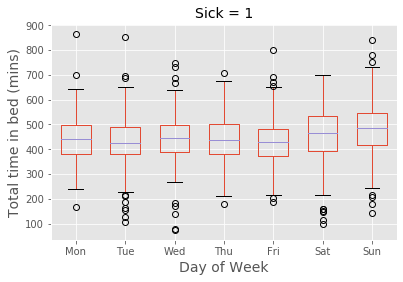

In [64]:
# bedtime: Total time in bed
# Sick
ax = df_sick.boxplot(column = 'bedtime', by = 'dayofweek', vert = True, widths = 0.6)
ax.set_xticklabels(minDayCodes[1:])
plt.ylabel('Total time in bed (mins)', fontsize=14)
plt.xlabel('Day of Week', fontsize=14)
plt.suptitle('')
plt.title('Sick = 1', fontsize=14)
plt.show()

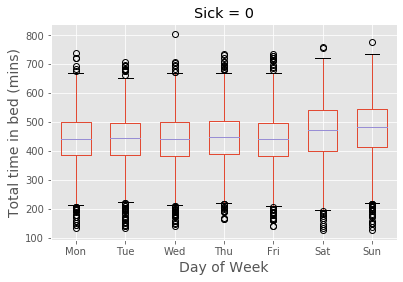

In [65]:
# bedtime: Total time in bed
# Notsick
ax = df_notsick.boxplot(column = 'bedtime', by = 'dayofweek', widths = 0.6)
ax.set_xticklabels(minDayCodes[1:])
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Total time in bed (mins)', fontsize=14)
plt.suptitle('')
plt.title('Sick = 0');

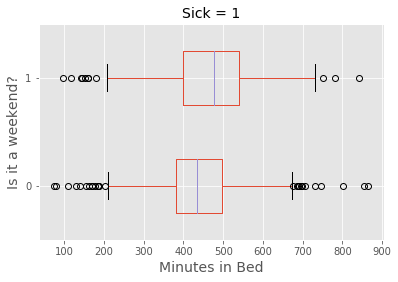

In [66]:
# bedtime: Total time in bed
# Sick
ax = df_sick.boxplot(column = 'bedtime', by = 'weekend', vert = False, widths = 0.5)
plt.xlabel('Minutes in Bed', fontsize=14)
plt.ylabel('Is it a weekend?', fontsize=14);
plt.suptitle('')
plt.title('Sick = 1', fontsize=14);

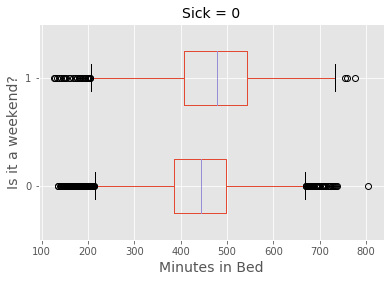

In [67]:
# bedtime: Total time in bed
# Notsick
ax = df_notsick.boxplot(column = 'bedtime', by = 'weekend', vert = False, widths = 0.5)
plt.xlabel('Minutes in Bed', fontsize=14)
plt.ylabel('Is it a weekend?', fontsize=14);
plt.suptitle('')
plt.title('Sick = 0', fontsize=14);

<Figure size 1440x720 with 0 Axes>

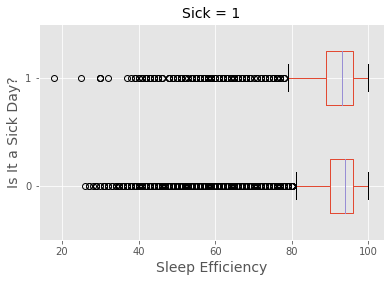

In [68]:
#Sleep efficiency: Total time awake in bed
fig = plt.figure(figsize = (20,10))
allData.boxplot(column = 'sleepEfficiency', by = 'Sick', vert = False, widths = 0.5)
plt.xlabel('Sleep Efficiency',fontsize=14)
plt.ylabel('Is It a Sick Day?',fontsize=14)
plt.suptitle('')
plt.title('Sick = 1', fontsize=14);
#plt.title('Sleep Efficiency');
#print('Average daily steps for the users feeling not sick: ',round(df_notsick['steps'].mean(),2))
#print('Average daily steps for the users feeling sick: ',round(df_sick['steps'].mean(),2))


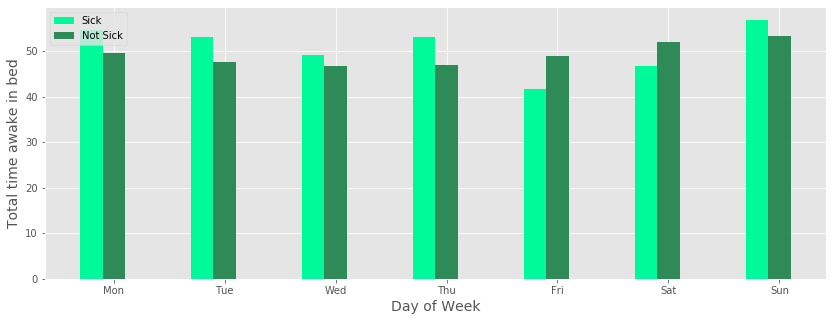

In [69]:
#Sleep Latency: Total time awake in bed
fig = plt.figure(figsize = (14,5))
plt.bar((dayGroupedData_sick.index), dayGroupedData_sick['sleepLatency'],width = 0.2, color='mediumspringgreen', label="Sick", tick_label=minDayCodes[1:])
plt.bar((dayGroupedData_notsick.index+0.2), dayGroupedData_notsick['sleepLatency'],width = 0.2, color='seagreen', label="Not Sick", tick_label=minDayCodes[1:])
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Total time awake in bed', fontsize=14)
plt.legend()

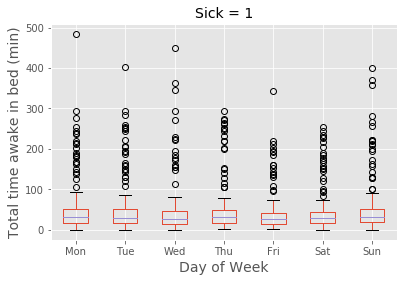

In [70]:
# Sleep Latency: Total time awake in bed
# Sick
ax = df_sick.boxplot(column = 'sleepLatency', by = 'dayofweek')
ax.set_xticklabels(minDayCodes[1:])
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Total time awake in bed (min)', fontsize=14)
plt.suptitle('')
plt.title('Sick = 1', fontsize=14);

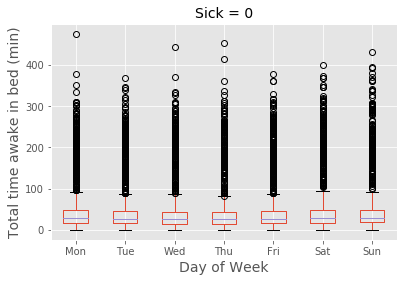

In [71]:
# Sleep Latency: Total time awake in bed
# Notsick
ax = df_notsick.boxplot(column = 'sleepLatency', by = 'dayofweek')
ax.set_xticklabels(minDayCodes[1:])
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Total time awake in bed (min)', fontsize=14)
plt.suptitle('')
plt.title('Sick = 0', fontsize=14);

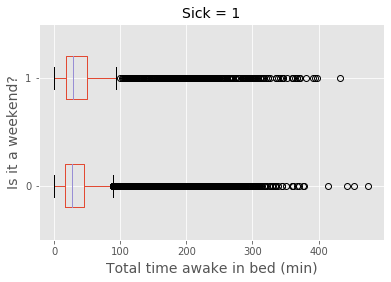

In [72]:
# Sleep Latency: Total time awake in bed
# Sick
ax = df_notsick.boxplot(column = 'sleepLatency', by = 'weekend', vert = False, widths = 0.4)
plt.xlabel('Total time awake in bed (min)', fontsize=14)
plt.ylabel('Is it a weekend?', fontsize=14);
plt.suptitle('')
plt.title('Sick = 1', fontsize=14);

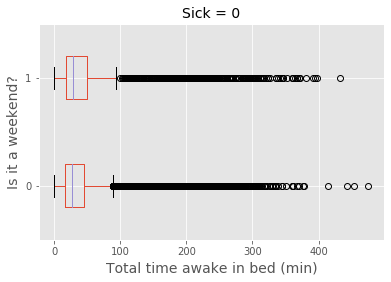

In [73]:
# Sleep Latency: Total time awake in bed
# Notsick
ax = df_notsick.boxplot(column = 'sleepLatency', by = 'weekend', vert = False, widths = 0.4)
plt.xlabel('Total time awake in bed (min)' , fontsize=14)
plt.ylabel('Is it a weekend?', fontsize=14);
plt.suptitle('')
plt.title('Sick = 0', fontsize=14);

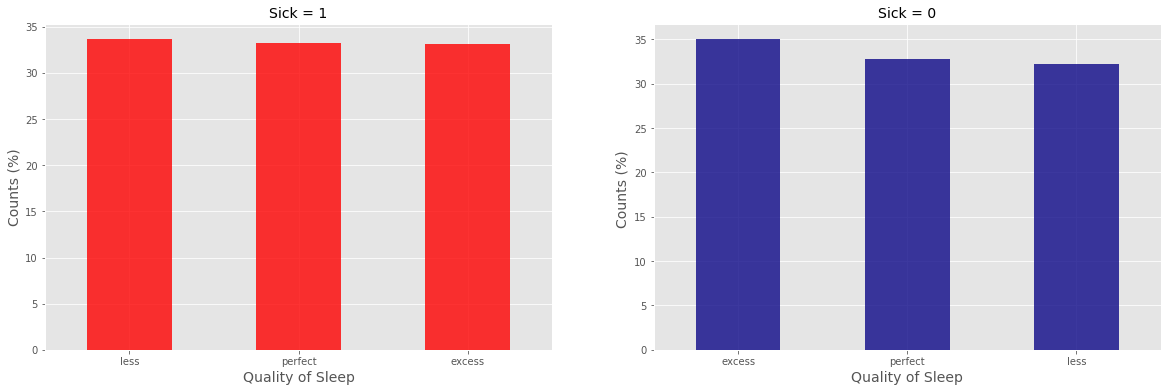

In [74]:
fig = plt.figure(figsize = (20,6))

ax = plt.subplot(121)  
(pd.value_counts(df_sick['sleepfactor'])*100/df_sick.shape[0]).plot.bar(cmap="autumn", alpha=0.8)
plt.xlabel('Quality of Sleep', fontsize=14)
plt.ylabel('Counts (%)', fontsize=14)
plt.title('Sick = 1', fontsize=14)
plt.xticks(rotation=0)

#############

ax2 = fig.add_subplot(122)
(pd.value_counts(df_notsick['sleepfactor'])*100/df_notsick.shape[0]).plot.bar(cmap="plasma", alpha=0.8)
plt.xlabel('Quality of Sleep', fontsize=14)
plt.ylabel('Counts (%) ', fontsize=14)
plt.title('Sick = 0', fontsize=14)
plt.xticks(rotation=0)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


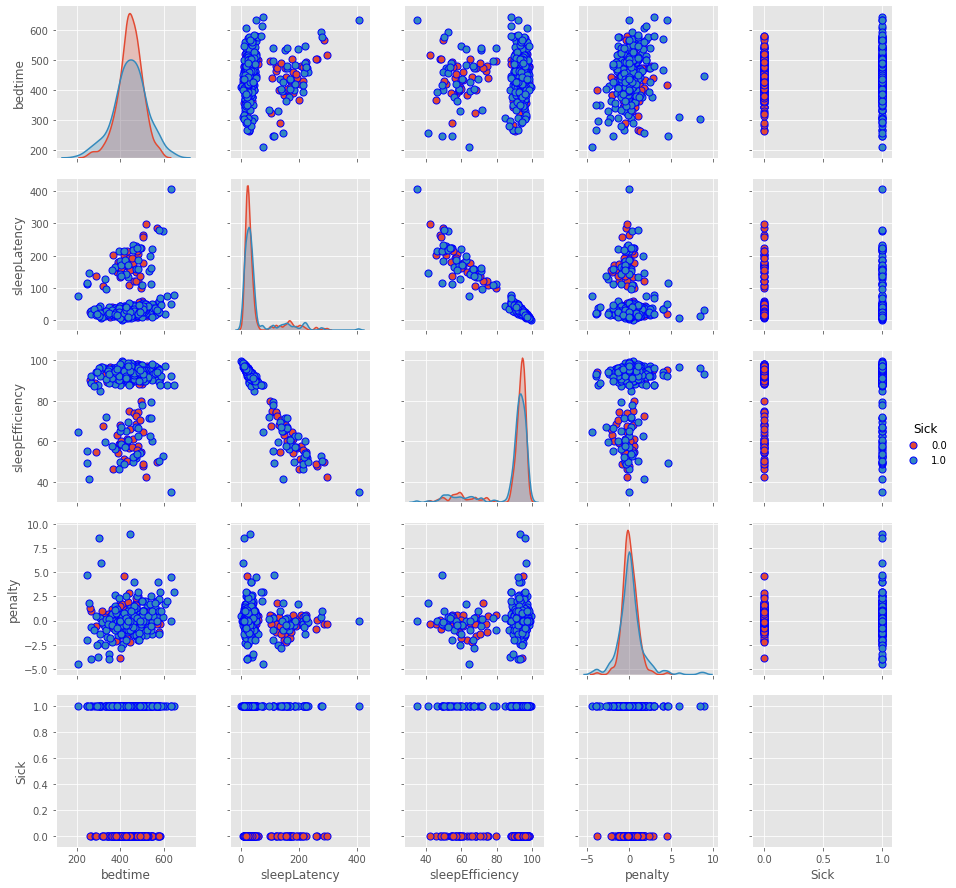

In [75]:
# Corrleation
# Sick day parameters grouped by individual users
#df_user_sick=df_sick.groupby(['userId']).mean()
# Not sick day parameters grouped by individual users
#df_user_notsick=df_notsick.groupby(['userId']).mean()
#frames = [df_user_sick, df_user_notsick]
#userGroupedData = pd.concat(frames)

df_active=userGroupedData[['bedtime','sleepLatency','sleepEfficiency', 'penalty','Sick']]
sns.pairplot(df_active, hue='Sick',kind="scatter", markers="o", plot_kws=dict(s=50, edgecolor="b", linewidth=1))
plt.show()

### Removal of Outliers

In [76]:
# bedtime
# Removing the outliers for Sick = 1
Q1_bedtime=df_sick['bedtime'].quantile(0.25)
Q3_bedtime=df_sick['bedtime'].quantile(0.75)
IQR_bedtime=Q3_bedtime-Q1_bedtime
df_sick =df_sick[(df_sick['bedtime']>=(Q1_bedtime - 1.5 * IQR_bedtime))& (df_sick['bedtime'] <= (Q3_bedtime + 1.5 * IQR_bedtime))]
df_sick = df_sick.reset_index(drop=True)
# Removing the outliers for Sick = 0
Q1_bedtime=df_notsick['bedtime'].quantile(0.25)
Q3_bedtime=df_notsick['bedtime'].quantile(0.75)
IQR_bedtime=Q3_bedtime-Q1_bedtime
df_notsick =df_notsick[(df_notsick['bedtime']>=(Q1_bedtime - 1.5 * IQR_bedtime))& (df_notsick['bedtime'] <= (Q3_bedtime + 1.5 * IQR_bedtime))]
df_notsick = df_notsick.reset_index(drop=True)


# Sleep Latency
# Removing the outliers for Sick = 1
Q1_sleepLatency=df_sick['sleepLatency'].quantile(0.25)
Q3_sleepLatency=df_sick['sleepLatency'].quantile(0.75)
IQR_sleepLatency=Q3_sleepLatency-Q1_sleepLatency
df_sick =df_sick[(df_sick['sleepLatency']>=(Q1_sleepLatency - 1.5 * IQR_sleepLatency))& (df_sick['sleepLatency'] <= (Q3_sleepLatency + 1.5 * IQR_sleepLatency))]
df_sick = df_sick.reset_index(drop=True)
# Removing the outliers for Sick = 0
Q1_sleepLatency=df_notsick['sleepLatency'].quantile(0.25)
Q3_sleepLatency=df_notsick['sleepLatency'].quantile(0.75)
IQR_sleepLatency=Q3_sleepLatency-Q1_sleepLatency
df_notsick =df_notsick[(df_notsick['sleepLatency']>=(Q1_sleepLatency - 1.5 * IQR_sleepLatency))& (df_notsick['sleepLatency'] <= (Q3_sleepLatency + 1.5 * IQR_sleepLatency))]
df_notsick = df_notsick.reset_index(drop=True)

# Sleep Efficiency
# Removing the outliers for Sick = 1
Q1_sleepEfficiency=df_sick['sleepEfficiency'].quantile(0.25)
Q3_sleepEfficiency=df_sick['sleepEfficiency'].quantile(0.75)
IQR_sleepEfficiency=Q3_sleepEfficiency-Q1_sleepEfficiency
df_sick =df_sick[df_sick['sleepEfficiency']>=1]
#df_sick =df_sick[(df_sick['sleepEfficiency']>=(Q1_sleepEfficiency - 1.5 * IQR_sleepEfficiency))& (df_sick['sleepEfficiency'] <= (Q3_sleepEfficiency + 1.5 * IQR_sleepEfficiency))]
df_sick = df_sick.reset_index(drop=True)
# Removing the outliers for Sick = 0
Q1_sleepEfficiency=df_notsick['sleepEfficiency'].quantile(0.25)
Q3_sleepEfficiency=df_notsick['sleepEfficiency'].quantile(0.75)
IQR_sleepEfficiency=Q3_sleepEfficiency-Q1_sleepEfficiency
df_notsick =df_notsick[(df_notsick['sleepEfficiency']>=(Q1_sleepEfficiency - 1.5 * IQR_sleepEfficiency))& (df_notsick['sleepEfficiency'] <= (Q3_sleepEfficiency + 1.5 * IQR_sleepEfficiency))]
df_notsick = df_notsick.reset_index(drop=True)


## 2.4.3 Visualization of Other Data

Our visualizations of the resting heart rate is shown below. Most of the users tend to have a heart rate in the range of __50-70__ bpm, which is acceptable and commonly reported in the literature as the normal range of heart rate. However, both the high and low heart rate are indicators of feeling discomfort and sick. A person consistently demonstrating a slow heart rate is believed to develop __bradycardia__ and a person consistently demonstrating a fast heart rate is believed to develop __tachycardia__. Therefore, a person exhibiting resting heart rate below 50 bpm
or above 80 bpm might be prone to these two medical conditions and feel sick. Consequently, the heart rate data in the low and high range (often detected as outliers) may be important to train our machine learning model for these conditions and we will not remove them from __Sick = 1__. However, we can remove the outliers in __Sick = 0__ outside of 50-80 bpm, as general consensus is any heart rate outside of this range comes with discomfort and feeling of sickness.

### Resting Heart Rate

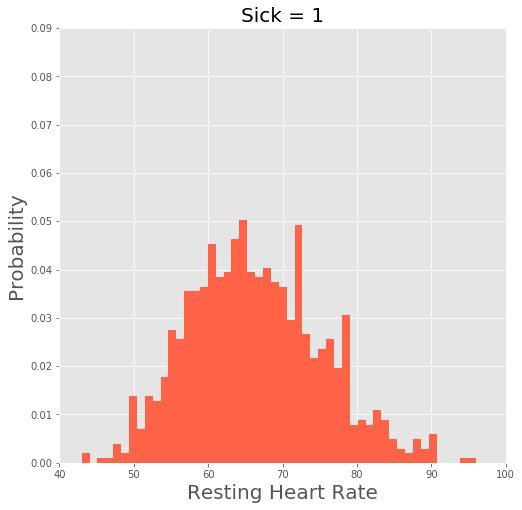

In [77]:

fig = plt.figure(figsize = (8,8))
n, bins, patches = plt.hist(df_sick['restingHeartRate'], 50, density=True, facecolor='tomato', alpha=1)
plt.xlabel('Resting Heart Rate',fontsize=20 )
plt.ylabel('Probability',fontsize=20)
plt.title('Sick = 1',fontsize=20)
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 100)
plt.ylim(0, .09)
plt.grid(True)
plt.show()

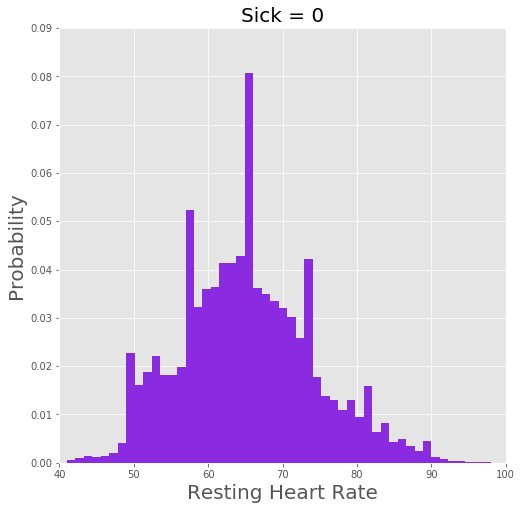

In [78]:
fig = plt.figure(figsize = (8,8))
n, bins, patches = plt.hist(df_notsick['restingHeartRate'], 50, density=True, facecolor='blueviolet', alpha=1)
plt.xlabel('Resting Heart Rate',fontsize=20 )
plt.ylabel('Probability',fontsize=20)
plt.title('Sick = 0',fontsize=20)
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 100)
plt.ylim(0, .09)
plt.grid(True)
plt.show()

<Figure size 1440x720 with 0 Axes>

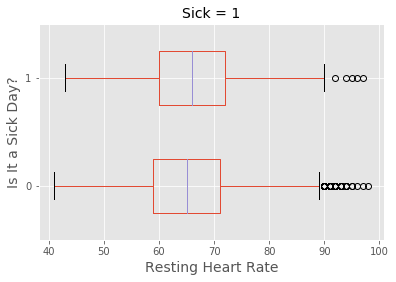

In [79]:
#Resting Heart Rate
fig = plt.figure(figsize = (20,10))
allData.boxplot(column = 'restingHeartRate', by = 'Sick', vert = False, widths = 0.5)
plt.xlabel('Resting Heart Rate',fontsize=14)
plt.ylabel('Is It a Sick Day?',fontsize=14)
plt.suptitle('')
plt.title('Sick = 1', fontsize=14);

### Humidity

In regard to the humidity as shown in the following figure, we can see from that the users feeling sick are often experienced higher humidity compared to __Sick = 0__ class. Our data shows that the mean humidity of __Sick = 1__ class (69%) is higher than the mean humidity of __Sick = 0__ class (65%). Likewise, exposure to both high and low atmospheric pressure can cause discomfort and feeling of sickness. For instance, a low atmospheric pressure, due to high altitude of the user's location, makes it diffcult to breath as the oxygen concentration of the air reduces. This expected trend is also visible in our computation of the statistics of air pressure for __Sick = 1__ and __Sick = 0__ classes. We can see a higher number of users feeling sick are exposed to either high or low atmospheric pressure compared to the users in __Sick = 0__ class.

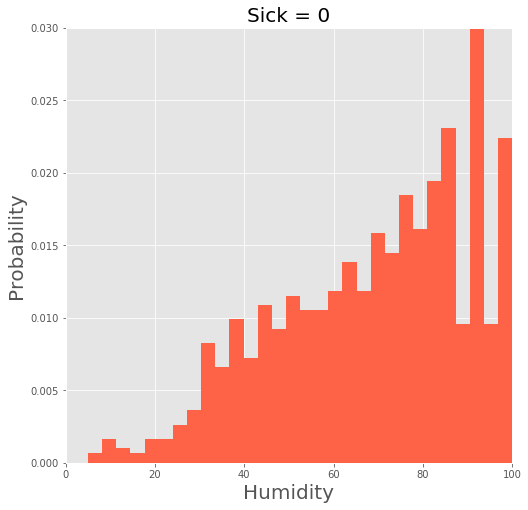

In [80]:
fig = plt.figure(figsize = (8,8))
n, bins, patches = plt.hist(df_sick['humidity'], 30, density=True, facecolor='tomato', alpha=1)
plt.xlabel('Humidity',fontsize=20 )
plt.ylabel('Probability',fontsize=20)
plt.title('Sick = 0',fontsize=20)
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 100)
plt.ylim(0, .03)
plt.grid(True)
plt.show()

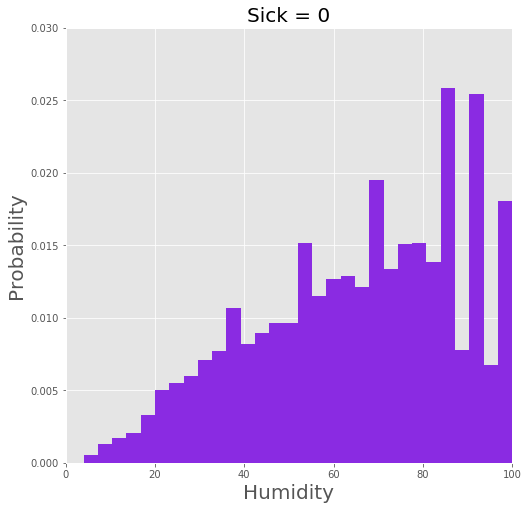

In [81]:
fig = plt.figure(figsize = (8,8))
n, bins, patches = plt.hist(df_notsick['humidity'], 30, density=True, facecolor='blueviolet', alpha=1)
plt.xlabel('Humidity',fontsize=20 )
plt.ylabel('Probability',fontsize=20)
plt.title('Sick = 0',fontsize=20)
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 100)
plt.ylim(0, .03)
plt.grid(True)
plt.show()

<Figure size 1440x720 with 0 Axes>

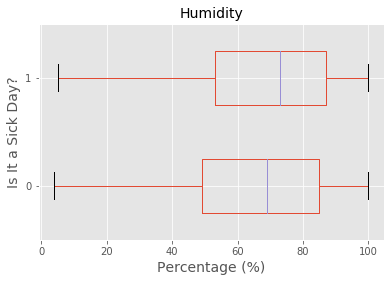

In [82]:
#Humidity
fig = plt.figure(figsize = (20,10))
allData.boxplot(column = 'humidity', by = 'Sick', vert = False, widths = 0.5)
plt.xlabel('Percentage (%)',fontsize=14)
plt.ylabel('Is It a Sick Day?',fontsize=14)
plt.suptitle('')
plt.title('Humidity', fontsize=14);

### Atmospheric Pressure

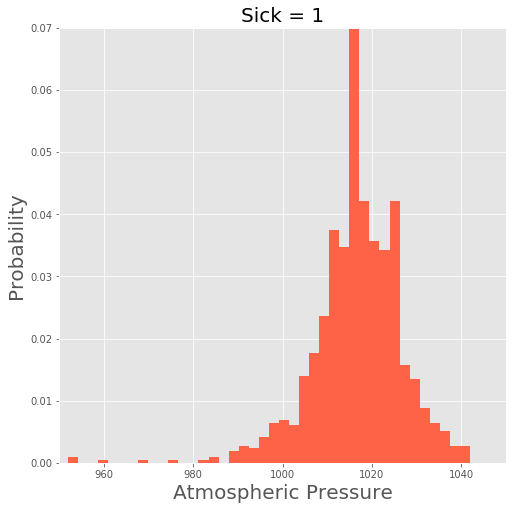

In [83]:
fig = plt.figure(figsize = (8,8))
n, bins, patches = plt.hist(df_sick['atmPressure'], 60, density=True, facecolor='tomato', alpha=1)
plt.xlabel('Atmospheric Pressure',fontsize=20 )
plt.ylabel('Probability',fontsize=20)
plt.title('Sick = 1',fontsize=20)
#plt.text(60, .05, r'$\mu=100,\ \sigma=15$')
plt.xlim(950, 1050)
plt.ylim(0, 0.07)
plt.grid(True)
plt.show()

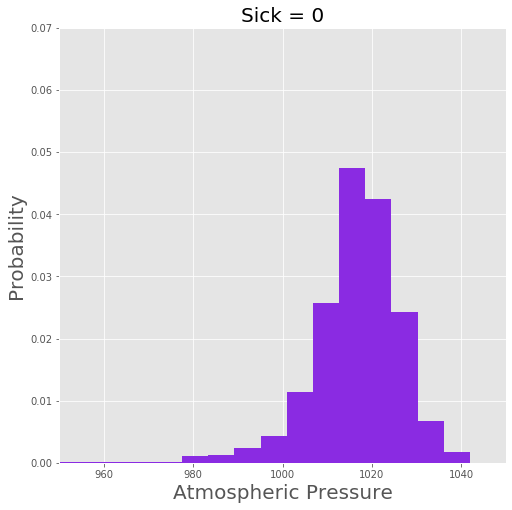

In [84]:
fig = plt.figure(figsize = (8,8))
n, bins, patches = plt.hist(df_notsick['atmPressure'], 60, density=True, facecolor='blueviolet', alpha=1)
plt.xlabel('Atmospheric Pressure',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.title('Sick = 0',fontsize=20)
#plt.text(60, .05, r'$\mu=100,\ \sigma=15$')
plt.xlim(950, 1050)
plt.ylim(0, 0.07)
plt.grid(True)
plt.show()

<Figure size 1440x720 with 0 Axes>

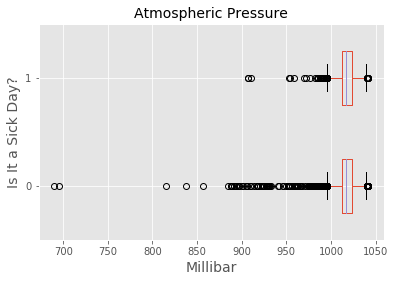

In [85]:
#Resting Atm Pressure
fig = plt.figure(figsize = (20,10))
allData.boxplot(column = 'atmPressure', by = 'Sick', vert = False, widths = 0.5)
plt.xlabel('Millibar',fontsize=14)
plt.ylabel('Is It a Sick Day?',fontsize=14)
plt.suptitle('')
plt.title('Atmospheric Pressure', fontsize=14);

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


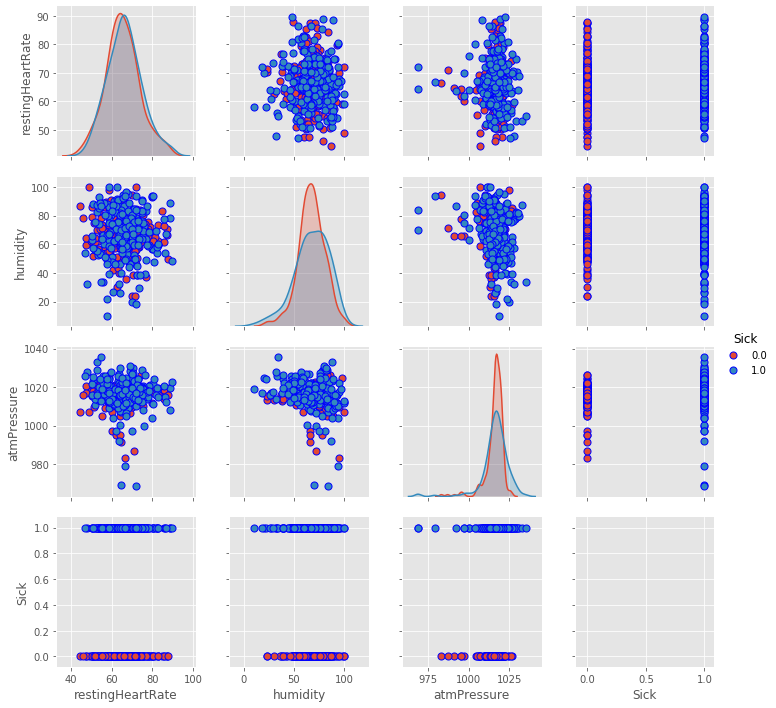

In [86]:
# Corrleation
# Sick day parameters grouped by individual users
df_user_sick=df_sick.groupby(['userId']).mean()
# Not sick day parameters grouped by individual users
df_user_notsick=df_notsick.groupby(['userId']).mean()
frames = [df_user_sick, df_user_notsick]
userGroupedData = pd.concat(frames)

df_active=userGroupedData[['restingHeartRate','humidity','atmPressure', 'Sick']]
sns.pairplot(df_active, hue='Sick',kind="scatter", markers="o", plot_kws=dict(s=50, edgecolor="b", linewidth=1))
plt.show()

### Removing Outliers

In [87]:
# Resting Heart Rate
# Removing the outliers for Sick = 1
Q1_restingHeartRate=df_sick['restingHeartRate'].quantile(0.25)
Q3_restingHeartRate=df_sick['restingHeartRate'].quantile(0.75)
IQR_restingHeartRate=Q3_restingHeartRate-Q1_restingHeartRate
# Removing the outliers for Sick = 0
Q1_restingHeartRate=df_notsick['restingHeartRate'].quantile(0.25)
Q3_restingHeartRate=df_notsick['restingHeartRate'].quantile(0.75)
IQR_restingHeartRate=Q3_restingHeartRate-Q1_restingHeartRate
# normal ppl should be 60-70, too low and too high are deseases (exception for athlate, could be lower and normal)
#df_notsick =df_notsick[(df_notsick['restingHeartRate']>=(Q1_restingHeartRate - 0.75 * IQR_restingHeartRate))& (df_notsick['restingHeartRate'] <= (Q3_restingHeartRate + 0.75 * IQR_restingHeartRate))]
df_notsick =df_notsick[(df_notsick['restingHeartRate']>=(50)) & (df_notsick['restingHeartRate'] <= (80))]
df_notsick = df_notsick.reset_index(drop=True)


# Humidity
# Removing the outliers for Sick = 1
Q1_humidity=df_sick['humidity'].quantile(0.25)
Q3_humidity=df_sick['humidity'].quantile(0.75)
IQR_humidity=Q3_humidity-Q1_humidity
df_sick =df_sick[(df_sick['humidity']>=(10))]
df_sick = df_sick.reset_index(drop=True)
# Removing the outliers for Sick = o
Q1_humidity=df_notsick['humidity'].quantile(0.25)
Q3_humidity=df_notsick['humidity'].quantile(0.75)
IQR_humidity=Q3_humidity-Q1_humidity
df_notsick =df_notsick[(df_notsick['humidity']>=(10))]
df_notsick = df_notsick.reset_index(drop=True)


# Atmospheric Pressure
# Removing the outliers for Sick = 1
Q1_atmPressure=df_sick['atmPressure'].quantile(0.25)
Q3_atmPressure=df_sick['atmPressure'].quantile(0.75)
IQR_atmPressure=Q3_atmPressure-Q1_atmPressure
df_sick =df_sick[(df_sick['atmPressure']>=(Q1_atmPressure - 1.5 * IQR_atmPressure))& (df_sick['atmPressure'] <= (Q3_atmPressure + 1.5 * IQR_atmPressure))]
df_sick = df_sick.reset_index(drop=True)
# Removing the outliers for Sick = 0
Q1_atmPressure=df_notsick['atmPressure'].quantile(0.25)
Q3_atmPressure=df_notsick['atmPressure'].quantile(0.75)
IQR_atmPressure=Q3_atmPressure-Q1_atmPressure
df_notsick =df_notsick[(df_notsick['atmPressure']>=(Q1_atmPressure - 1.5 * IQR_atmPressure))& (df_notsick['atmPressure'] <= (Q3_atmPressure + 1.5 * IQR_atmPressure))]
df_notsick = df_notsick.reset_index(drop=True)

# 2.5 Extraction of Features and Target Variables for Modeling

## 2.5.1 Data Preparation

### Merging the Dataframes

In [89]:
# Merging data to one dataframe
frames = [df_sick, df_notsick]
df_p = pd.concat(frames)

### Data Removal

We need to remove the following columns for which we already have extracted the features:
1. __userId__
2. __sleep_hour__
3. __wake_hour__
4. __sleepfactor__

In [90]:
df_p.drop(["userId"],1, inplace=True)
df_p.drop(["sleep_hour"],1, inplace=True)
df_p.drop(["wake_hour"], 1, inplace=True)
df_p.drop(["sleepfactor"], 1, inplace=True)

### Statistical Details of the Clean Data

In [91]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8198 entries, 0 to 7279
Data columns (total 21 columns):
steps               8198 non-null int64
activeMinutes       8198 non-null int64
sedentaryMinutes    8198 non-null int64
sleepEfficiency     8198 non-null int64
minutesAsleep       8198 non-null int64
restingHeartRate    8198 non-null float64
atmPressure         8198 non-null float64
humidity            8198 non-null float64
Sick                8198 non-null int64
energy              8198 non-null float64
feel                8198 non-null float64
dayofweek           8198 non-null int64
weekend             8198 non-null int64
sleep_penalty       8198 non-null int64
wake_penalty        8198 non-null int64
penalty             8198 non-null int64
excess              8198 non-null uint8
less                8198 non-null uint8
perfect             8198 non-null uint8
bedtime             8198 non-null float64
sleepLatency        8198 non-null float64
dtypes: float64(7), int64(11), uint8(3)

In [92]:
df_p.columns.values

array(['steps', 'activeMinutes', 'sedentaryMinutes', 'sleepEfficiency',
       'minutesAsleep', 'restingHeartRate', 'atmPressure', 'humidity',
       'Sick', 'energy', 'feel', 'dayofweek', 'weekend', 'sleep_penalty',
       'wake_penalty', 'penalty', 'excess', 'less', 'perfect', 'bedtime',
       'sleepLatency'], dtype=object)

In [93]:
df_p.describe()

,steps,activeMinutes,sedentaryMinutes,sleepEfficiency,minutesAsleep,restingHeartRate,atmPressure,humidity,Sick,energy,...,dayofweek,weekend,sleep_penalty,wake_penalty,penalty,excess,less,perfect,bedtime,sleepLatency
count,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,...,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000,8198.000000
mean,8188.686631,260.354233,690.637229,94.079410,422.924982,64.630886,1017.329064,65.504391,0.111979,7.923459,...,2.937302,0.268968,-0.191998,0.338985,0.146987,0.358624,0.302757,0.338619,449.674950,26.749968
std,3919.698252,93.497141,119.889780,3.300554,84.446817,7.584770,8.418228,22.543178,0.315359,1.947472,...,1.982902,0.443450,1.693906,1.729724,1.876181,0.479626,0.459479,0.473269,89.459312,15.968875
min,38.000000,4.000000,341.000000,71.000000,175.000000,43.000000,993.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,-12.000000,-12.000000,-18.000000,0.000000,0.000000,0.000000,209.183673,0.000000
25%,5279.000000,193.000000,610.000000,92.000000,370.000000,59.000000,1012.000000,49.000000,0.000000,8.000000,...,1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,393.684211,14.536082
50%,7592.500000,251.000000,692.000000,95.000000,425.000000,64.000000,1018.000000,69.000000,0.000000,8.071849,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,451.530772,23.935484
75%,10631.250000,321.000000,772.750000,97.000000,478.000000,70.000000,1023.000000,85.000000,0.000000,9.000000,...,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,508.602151,36.292420
max,20615.000000,617.000000,1031.000000,100.000000,672.000000,96.000000,1041.000000,100.000000,1.000000,10.000000,...,6.000000,1.000000,12.000000,12.000000,23.000000,1.000000,1.000000,1.000000,692.222222,93.473684


## 2.5.2 Construction of Feature and Target Variables 

In [94]:
Feature = df_p[[ 'steps', 'activeMinutes', 'sedentaryMinutes','sleepEfficiency', 'minutesAsleep', 'restingHeartRate','atmPressure', 'humidity', 'energy', 'feel', 'dayofweek','weekend', 'sleep_penalty','wake_penalty', 'penalty', 'excess', 'less','perfect', 'bedtime', 'sleepLatency']]
X=Feature
X = preprocessing.StandardScaler().fit(X).transform(X)
y = df_p['Sick'].values
print(X.shape)
print(np.mean(X,axis=0 ))
print(np.var(X,axis=0 ))

(8198, 20)
[ 7.47010271e-17 -2.86074057e-16 -2.39541655e-16  2.09249549e-15
 -3.15380261e-16  4.73693351e-16  4.65570495e-15 -2.67060235e-16
 -9.20518168e-16  2.85478182e-16  7.70574410e-17  4.12778700e-17
  1.86617142e-17  2.54059331e-17  1.52083491e-17  1.58719369e-17
  1.07311628e-16  5.95874763e-17  1.46693533e-16 -1.27625540e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# 3. Model Development

1. For random upsampling (or downsampling), run __Sec.3.1__ then start from __Sec.3.3__
2. For SMOTE, sun __Sec.3.2__, skip __Sec.3.1__ (if you run __Sec.3.1__, it will not be an error, just the values will be overwritten).

## 3.1 Resample

In [95]:
# Upsample
df_sick_upsampled = resample(df_sick,replace=True,n_samples=df_notsick.shape[0],random_state=42)
df_p_upsampled = pd.concat([df_sick_upsampled, df_notsick])
print(df_p_upsampled.Sick.value_counts())
df_p_sampled=df_p_upsampled
#Downsample
#df_notsick_downsampled = resample(df_notsick,replace=True,n_samples=df_sick.shape[0],random_state=42)
#df_p_downsampled = pd.concat([df_sick, df_notsick_downsampled])
#print(df_p_downsampled.Sick.value_counts())
#df_p_sampled=df_p_downsampled
# Preparation of Features and Target Variable 
Feature = df_p_sampled[[ 'steps', 'activeMinutes', 'sedentaryMinutes','sleepEfficiency', 'minutesAsleep', 'restingHeartRate','atmPressure', 'humidity', 'energy', 'feel', 'dayofweek','weekend', 'sleep_penalty','wake_penalty', 'penalty', 'excess', 'less','perfect', 'bedtime', 'sleepLatency']]
X=Feature
X = preprocessing.StandardScaler().fit(X).transform(X)
y = df_p_sampled['Sick'].values
print(X.shape)
print(np.mean(X,axis=0 ))
print(np.var(X,axis=0 ))


1    7280
0    7280
Name: Sick, dtype: int64
(14560, 20)
[-8.19857003e-17  5.27050930e-17  3.59175449e-16 -1.33519569e-15
 -1.28834672e-16  2.65477506e-16  7.72617623e-15 -1.13218348e-16
 -4.06024420e-16 -1.24930591e-16 -2.14724453e-17 -2.73285668e-17
 -2.34244858e-17  3.90408097e-18 -3.90408097e-18  9.36979432e-17
  1.17122429e-17 -7.51535586e-17 -1.31762733e-16  1.40546915e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 3.2 SMOTE

In [97]:
from collections import Counter
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
Feature_smote = df_p[[ 'steps', 'activeMinutes', 'sedentaryMinutes','sleepEfficiency', 'minutesAsleep', 'restingHeartRate','atmPressure', 'humidity', 'energy', 'feel', 'dayofweek','weekend', 'sleep_penalty','wake_penalty', 'penalty', 'excess', 'less','perfect', 'bedtime', 'sleepLatency']]
X_smote=Feature_smote
y_smote = df_p['Sick'].values
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X_smote, y_smote)
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X.shape)
print(np.mean(X,axis=0 ))
print(np.var(X,axis=0 ))

(14560, 20)
[-8.09777306e-15  1.52641140e-14 -1.90299547e-15  1.93023833e-13
  4.00535069e-15 -2.34314171e-14 -4.00078459e-13  4.82768587e-15
 -1.06350073e-13  1.09440829e-13  1.48082096e-15 -1.43493276e-15
 -7.27188456e-16  1.91596205e-15  9.31027996e-16 -2.25994437e-16
  3.13605398e-15 -2.33242150e-15  3.28818589e-14  1.43649592e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 3.3 Splits into Train, Validation and Test Sets

In [98]:
#Upsample/SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify=y_test, test_size=0.5, random_state=42)

#Downsample
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify=y_test, test_size=0.5, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Evaluation set:', X_val.shape,  y_val.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print('Size of training set :', (y_train.size*100/y.size),'%')
print('Size of cross-validation set :', (y_val.size*100/y.size),'%')
print('Size of testing set :', (y_test.size*100/y.size),'%')
print('Minority class population in training set :',100*sum(y_train)/y_train.size,'%')
print('Minority class population in cross-validation set :',100*sum(y_val)/y_val.size,'%')
print('Minority class population in testing set :',100*sum(y_test)/y_test.size,'%')

Train set: (11648, 20) (11648,)
Evaluation set: (1456, 20) (1456,)
Test set: (1456, 20) (1456,)
Size of training set : 80.0 %
Size of cross-validation set : 10.0 %
Size of testing set : 10.0 %
Minority class population in training set : 50.0 %
Minority class population in cross-validation set : 50.0 %
Minority class population in testing set : 50.0 %


## 3.4 Feature Importance using Random Forest Classifier

Feature ranking:
1. feature 9 (0.426544)
2. feature 8 (0.246053)
3. feature 17 (0.104833)
4. feature 16 (0.067047)
5. feature 15 (0.063045)
6. feature 11 (0.046605)
7. feature 10 (0.017796)
8. feature 7 (0.008589)
9. feature 5 (0.004146)
10. feature 14 (0.003027)
11. feature 0 (0.002411)
12. feature 3 (0.002291)
13. feature 1 (0.001695)
14. feature 19 (0.001475)
15. feature 6 (0.001068)
16. feature 12 (0.001038)
17. feature 13 (0.000655)
18. feature 18 (0.000640)
19. feature 4 (0.000609)
20. feature 2 (0.000431)


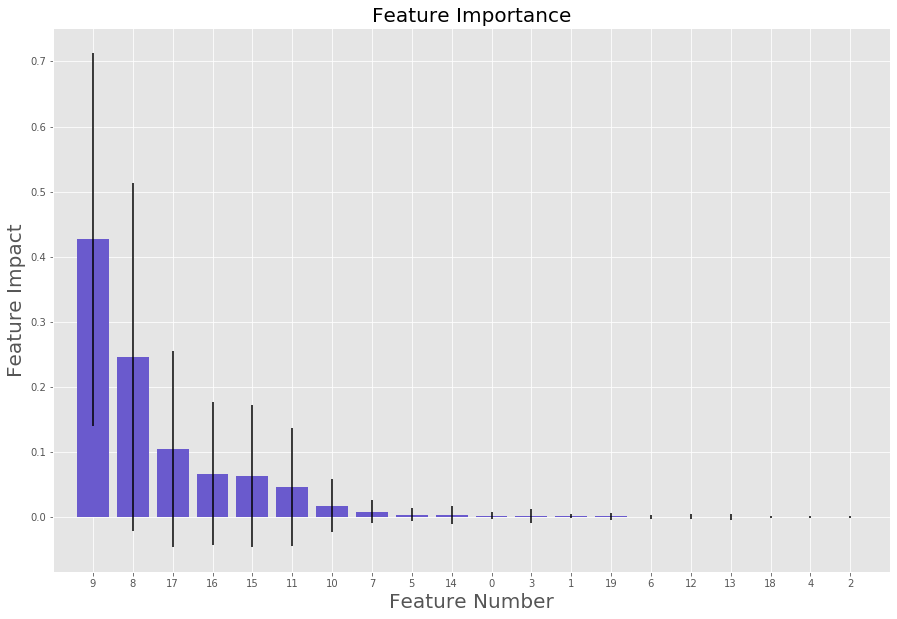

In [99]:
forest = ExtraTreesClassifier(max_depth= 5, max_features= 12, min_samples_split= 5, n_estimators= 500,random_state=0)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
fig=plt.figure(figsize = (15,10))
plt.title("Feature Importance", fontsize=20)
plt.xlabel("Feature Number", fontsize=20)
plt.ylabel("Feature Impact", fontsize=20)
plt.bar(range(X.shape[1]), importances[indices], color="slateblue", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
#fig.savefig('feature importance2.pdf')

## 3.5 Grid Search Approach for Training Phase 

In [100]:
def grid_search_wrapper(refit_score='recall_score'):
    
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_train)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the training data.
    print('\nConfusion matrix optimized for {} on the training data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_train, y_pred),columns=['Predict(not sick)', 'Predict(sick)'], index=['Actual(not sick)', 'Actual (sick)']))
    return grid_search

## 3.5.1 Logistic Regression (LR) Classifier

### LR Classifier with Grid Search 

In [101]:
clf = LogisticRegression(class_weight='balanced')
param_grid = {
    'C': 10**(np.linspace(-5,5,100))
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

### Model with Best Parameters

### Model Optimized for Recall

In [303]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'C': 0.13848863713938717}

Confusion matrix optimized for recall_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               4698           1126
Actual (sick)                  1760           4064


### Results

In [304]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_f1_score','mean_test_recall_score', 'mean_test_precision_score','mean_test_accuracy_score','param_C']].round(3).head()


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_C
42,0.736,0.697,0.781,0.751,0.174753
41,0.736,0.697,0.781,0.751,0.138489
50,0.736,0.697,0.781,0.750,1.12332
63,0.736,0.697,0.781,0.751,23.1013
72,0.736,0.697,0.781,0.751,187.382


### Saving the Best Model Based on Recall for Evaluation

In [305]:
joblib.dump(grid_search_clf.best_estimator_, 'LR_model_r.pkl')

['LR_model_r_up.pkl']

### Model Optimized for F1-Score

In [306]:
grid_search_clf = grid_search_wrapper(refit_score='f1_score')

Best params for f1_score
{'C': 0.1747528400007683}

Confusion matrix optimized for f1_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               4700           1124
Actual (sick)                  1760           4064


### Results

In [307]:

results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_f1_score', ascending=False)
results[['mean_test_f1_score','mean_test_recall_score', 'mean_test_precision_score','mean_test_accuracy_score','param_C']].round(3).head()


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_C
42,0.736,0.697,0.781,0.751,0.174753
41,0.736,0.697,0.781,0.751,0.138489
99,0.736,0.697,0.781,0.751,100000
70,0.736,0.697,0.781,0.751,117.681
78,0.736,0.697,0.781,0.751,756.463


### Saving the Best Model Based on F1-Score for Evaluation

In [308]:
joblib.dump(grid_search_clf.best_estimator_, 'LR_model.pkl')

['LR_model_up.pkl']

## 3.5.2 Decision Tree (DT) Classifier

### DT Classifier with Grid Search 

In [309]:
clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['entropy', 'gini'],
    'class_weight': ['balanced', None],
    'max_depth': [8, 10, 12, 16], 
    'min_samples_split': [15, 25],
    'max_features': [5, 10]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}


### Model with Best Parameters

### Model Optimized for Recall

In [310]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 16, 'max_features': 10, 'min_samples_split': 15}

Confusion matrix optimized for recall_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               5469            355
Actual (sick)                   167           5657


### Results

In [311]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_f1_score','mean_test_recall_score', 'mean_test_precision_score',  'mean_test_accuracy_score', 'param_criterion', 'param_class_weight', 'param_max_depth', 'param_min_samples_split', 'param_max_features']].round(3).head(5)


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_criterion,param_class_weight,param_max_depth,param_min_samples_split,param_max_features
30,0.912,0.949,0.879,0.909,gini,balanced,16,15,10
46,0.903,0.935,0.873,0.899,entropy,None,16,15,10
44,0.901,0.934,0.871,0.897,entropy,None,16,15,5
62,0.913,0.934,0.894,0.911,gini,None,16,15,10
63,0.904,0.932,0.877,0.900,gini,None,16,25,10


### Saving the Best Model Based on Recall for Evaluation

In [312]:
joblib.dump(grid_search_clf.best_estimator_, 'DT_model_r.pkl')

['DT_model_r_up.pkl']

### Model Optimized for F1-Score

In [313]:
grid_search_clf = grid_search_wrapper(refit_score='f1_score')
#{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'max_features': 10, 'min_samples_split': 25}

Best params for f1_score
{'class_weight': None, 'criterion': 'gini', 'max_depth': 16, 'max_features': 10, 'min_samples_split': 15}

Confusion matrix optimized for f1_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               5541            283
Actual (sick)                   165           5659


### Results

In [314]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_f1_score', ascending=False)
results[['mean_test_f1_score','mean_test_recall_score', 'mean_test_precision_score',  'mean_test_accuracy_score', 'param_criterion', 'param_class_weight', 'param_max_depth', 'param_min_samples_split', 'param_max_features']].round(3).head(5)


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_criterion,param_class_weight,param_max_depth,param_min_samples_split,param_max_features
62,0.923,0.954,0.895,0.921,gini,None,16,15,10
30,0.918,0.949,0.889,0.915,gini,balanced,16,15,10
14,0.903,0.919,0.888,0.901,entropy,balanced,16,15,10
44,0.903,0.936,0.872,0.899,entropy,None,16,15,5
31,0.899,0.927,0.874,0.896,gini,balanced,16,25,10


### Saving the Best Model Based on F1-Score for Evaluation

In [315]:
joblib.dump(grid_search_clf.best_estimator_, 'DT_model.pkl')

['DT_model_up.pkl']

## 3.5.3 Random Forest (RF) Classifier

### RF Classifier with Grid Search 

In [316]:
clf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
param_grid = {
    
    'criterion': ['entropy', 'gini'],
    'max_depth': [15, 25],
    'max_features': [5, 8],
    'min_samples_split': [10, 15], 
    'n_estimators' : [100, 300]  
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

### Model with Best Parameters

### Model Optimized for Recall

In [317]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'criterion': 'entropy', 'max_depth': 25, 'max_features': 8, 'min_samples_split': 10, 'n_estimators': 100}

Confusion matrix optimized for recall_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               5824              0
Actual (sick)                     2           5822


### Results

In [318]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_f1_score','mean_test_recall_score', 'mean_test_precision_score',  'mean_test_accuracy_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators',  'param_criterion']].round(3).head()


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,param_criterion
12,0.976,0.993,0.960,0.976,25,8,10,100,entropy
13,0.977,0.993,0.961,0.976,25,8,10,300,entropy
29,0.976,0.992,0.961,0.976,25,8,10,300,gini
25,0.977,0.992,0.962,0.976,25,5,10,300,gini
28,0.976,0.992,0.960,0.975,25,8,10,100,gini


### Saving the Best Model Based on Recall for Evaluation

In [320]:
joblib.dump(grid_search_clf.best_estimator_, 'RF_model_r.pkl')

['RF_model_r_up.pkl']

### Model Optimized for F1-Score

In [321]:
grid_search_clf = grid_search_wrapper(refit_score='f1_score')

Best params for f1_score
{'criterion': 'gini', 'max_depth': 25, 'max_features': 8, 'min_samples_split': 10, 'n_estimators': 300}

Confusion matrix optimized for f1_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               5824              0
Actual (sick)                     3           5821


### Results

In [322]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_f1_score', ascending=False)
results[['mean_test_f1_score','mean_test_recall_score', 'mean_test_precision_score',  'mean_test_accuracy_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators', 'param_criterion']].round(3).head()


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,param_criterion
29,0.977,0.993,0.961,0.976,25,8,10,300,gini
8,0.977,0.991,0.963,0.976,25,5,10,100,entropy
9,0.976,0.992,0.961,0.976,25,5,10,300,entropy
12,0.976,0.993,0.960,0.976,25,8,10,100,entropy
24,0.976,0.990,0.962,0.976,25,5,10,100,gini


### Saving the Best Model Based on F1-Score for Evaluation

In [326]:
joblib.dump(grid_search_clf.best_estimator_, 'RF_model.pkl')

['RF_model_up.pkl']

## 3.5.4 Gradient Boosting (GB) Classifier

### GB Classifier with Grid Search 

In [327]:
clf = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 9],
    #'min_samples_split':[15, 25],
    'learning_rate': [ 0.1, 1, 10]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

### Model with Best Parameters

### Model Optimized for Recall

In [328]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'learning_rate': 1, 'max_depth': 9, 'n_estimators': 300}

Confusion matrix optimized for recall_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               5824              0
Actual (sick)                     0           5824


### Results

In [329]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_f1_score','mean_test_recall_score', 'mean_test_precision_score',  'mean_test_accuracy_score', 'param_n_estimators', 'param_max_depth',  'param_learning_rate']].round(3).head()


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_n_estimators,param_max_depth,param_learning_rate
7,0.978,0.996,0.961,0.978,300,9,1
4,0.968,0.996,0.942,0.967,100,5,1
5,0.973,0.996,0.951,0.972,300,5,1
6,0.975,0.996,0.955,0.975,100,9,1
3,0.984,0.995,0.973,0.984,300,9,0.1


### Saving the Best Model Based on Recall for Evaluation

In [331]:
joblib.dump(grid_search_clf.best_estimator_, 'GB_model_r.pkl')

['GB_model_r_up.pkl']

### Model Optimized for F1-Score

In [332]:
grid_search_clf = grid_search_wrapper(refit_score='f1_score')

Best params for f1_score
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}

Confusion matrix optimized for f1_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               5824              0
Actual (sick)                     0           5824


### Results

In [333]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_f1_score', ascending=False)
results[['mean_test_f1_score','mean_test_recall_score', 'mean_test_precision_score',  'mean_test_accuracy_score', 'param_n_estimators', 'param_max_depth',  'param_learning_rate']].round(3).head()


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_n_estimators,param_max_depth,param_learning_rate
3,0.983,0.996,0.972,0.983,300,9,0.1
6,0.976,0.996,0.957,0.976,100,9,1
7,0.976,0.996,0.957,0.976,300,9,1
2,0.976,0.995,0.957,0.975,100,9,0.1
5,0.974,0.995,0.953,0.973,300,5,1


### Saving the Best Model Based on F1-Score for Evaluation

In [335]:
joblib.dump(grid_search_clf.best_estimator_, 'GB_model.pkl')

['GB_model_up.pkl']

## 3.5.5 Multi-Layer Perceptron (MLP)

### MLP Classifier with Grid Search 

In [336]:
clf = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

### Model with Best Parameters

### Model Optimized for Recall

In [337]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

Confusion matrix optimized for recall_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               5579            245
Actual (sick)                    90           5734


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Results 

In [338]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_f1_score','mean_test_recall_score', 'mean_test_precision_score',  'mean_test_accuracy_score', 'param_hidden_layer_sizes', 'param_activation', 'param_learning_rate']].round(3).head()


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_hidden_layer_sizes,param_activation,param_learning_rate
9,0.927,0.969,0.889,0.924,"(100,)",tanh,constant
10,0.929,0.968,0.893,0.926,"(100,)",tanh,invscaling
11,0.924,0.961,0.890,0.921,"(100,)",tanh,adaptive
8,0.889,0.915,0.864,0.886,"(50,)",tanh,adaptive
4,0.894,0.912,0.876,0.891,"(100,)",relu,invscaling


### Saving the Best Model Based on Recall for Evaluation

In [340]:
joblib.dump(grid_search_clf.best_estimator_, 'MLP_model_r.pkl')

['MLP_model_r_up.pkl']

### Model Optimized for F1-Score

In [341]:
grid_search_clf = grid_search_wrapper(refit_score='f1_score')

Best params for f1_score
{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}

Confusion matrix optimized for f1_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               5633            191
Actual (sick)                    68           5756


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Results

In [342]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_f1_score', ascending=False)
results[['mean_test_f1_score','mean_test_recall_score', 'mean_test_precision_score',  'mean_test_accuracy_score', 'param_hidden_layer_sizes', 'param_activation', 'param_learning_rate']].round(3).head()


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_hidden_layer_sizes,param_activation,param_learning_rate
10,0.926,0.964,0.891,0.923,"(100,)",tanh,invscaling
9,0.925,0.963,0.890,0.922,"(100,)",tanh,constant
11,0.925,0.965,0.887,0.921,"(100,)",tanh,adaptive
5,0.894,0.914,0.875,0.891,"(100,)",relu,adaptive
6,0.893,0.918,0.869,0.890,"(50,)",tanh,constant


### Saving the Best Model F1-Score for Evaluation

In [344]:
joblib.dump(grid_search_clf.best_estimator_, 'MLP_model.pkl')

['MLP_model_up.pkl']

## 3.5.6 Support Vector Machine (SVM)

### SVM with Grid Search 

In [345]:
clf = SVC()
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.001, 0.1, 1, 10, 10]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

### Model with Best Parameters

### Model Optimized for Recall

In [346]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'C': 10, 'kernel': 'rbf'}

Confusion matrix optimized for recall_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               5486            338
Actual (sick)                   340           5484


### Results

In [347]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_f1_score','mean_test_recall_score', 'mean_test_precision_score',  'mean_test_accuracy_score', 'param_kernel', 'param_C']].round(3).head()


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_kernel,param_C
7,0.902,0.916,0.888,0.901,rbf,10
9,0.902,0.916,0.888,0.901,rbf,10
5,0.825,0.798,0.854,0.831,rbf,1
3,0.769,0.726,0.817,0.782,rbf,0.1
2,0.760,0.704,0.825,0.778,linear,0.1


### Saving the Best Model Based on Recall for Evaluation

In [349]:
joblib.dump(grid_search_clf.best_estimator_, 'SVM_model_r.pkl')

['SVM_model_r_up.pkl']

### Model Optimized for F1-Score

In [350]:
grid_search_clf = grid_search_wrapper(refit_score='f1_score')

Best params for f1_score
{'C': 10, 'kernel': 'rbf'}

Confusion matrix optimized for f1_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               5486            338
Actual (sick)                   340           5484


### Results

In [351]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_f1_score', ascending=False)
results[['mean_test_f1_score','mean_test_recall_score', 'mean_test_precision_score',  'mean_test_accuracy_score', 'param_kernel', 'param_C']].round(3).head()


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_kernel,param_C
7,0.902,0.916,0.888,0.901,rbf,10
9,0.902,0.916,0.888,0.901,rbf,10
5,0.825,0.798,0.854,0.831,rbf,1
3,0.769,0.726,0.817,0.782,rbf,0.1
2,0.760,0.704,0.825,0.778,linear,0.1


### Saving the Best Model F1-Score for Evaluation

In [353]:
joblib.dump(grid_search_clf.best_estimator_, 'SVM_model.pkl')

['SVM_model_up.pkl']

## 3.5.7 k-Nearest Neighbors (k-NN)

### k-NN with Grid Search 

In [354]:
clf = KNeighborsClassifier(n_jobs=-1)

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 12],
    'weights': ['uniform', 'distance'],
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}


### Model with Best Parameters

### Model Optimized for Recall

In [355]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'n_neighbors': 12, 'weights': 'distance'}

Confusion matrix optimized for recall_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               5824              0
Actual (sick)                     0           5824


### Results

In [356]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_f1_score', 'mean_test_recall_score', 'mean_test_precision_score',  'mean_test_accuracy_score', 'param_n_neighbors', 'param_weights']].round(3).head()


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_n_neighbors,param_weights
9,0.889,0.996,0.803,0.875,12,distance
5,0.884,0.995,0.794,0.869,7,distance
7,0.879,0.995,0.788,0.863,9,distance
3,0.894,0.995,0.812,0.882,5,distance
1,0.914,0.994,0.847,0.907,3,distance


### Saving the Best Model Based on Recall for Evaluation

In [358]:
joblib.dump(grid_search_clf.best_estimator_, 'KNN_model_r.pkl')

['KNN_model_r_up.pkl']

### Model Optimized for F1-Score

In [359]:
grid_search_clf = grid_search_wrapper(refit_score='f1_score')

Best params for f1_score
{'n_neighbors': 3, 'weights': 'distance'}

Confusion matrix optimized for f1_score on the training data:
                  Predict(not sick)  Predict(sick)
Actual(not sick)               5824              0
Actual (sick)                     0           5824


### Results

In [360]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_f1_score', ascending=False)
results[['mean_test_f1_score', 'mean_test_recall_score', 'mean_test_precision_score',  'mean_test_accuracy_score', 'param_n_neighbors', 'param_weights']].round(3).head()


,mean_test_f1_score,mean_test_recall_score,mean_test_precision_score,mean_test_accuracy_score,param_n_neighbors,param_weights
1,0.914,0.994,0.847,0.907,3,distance
0,0.906,0.979,0.844,0.899,3,uniform
3,0.894,0.995,0.812,0.882,5,distance
9,0.889,0.996,0.803,0.875,12,distance
5,0.884,0.995,0.794,0.869,7,distance


### Saving the Best Model Based on F1-Value for Evaluation

In [362]:
joblib.dump(grid_search_clf.best_estimator_, 'KNN_model.pkl')

['KNN_model_up.pkl']

## 3.3 Model Evaluation

### Importing the Best Models for Each Algorithms

## model based on F1-Score

In [108]:
models = {}

## Model based on best F1-Score
for mdl in ['LR', 'DT', 'RF', 'GB', 'MLP', 'SVM', 'KNN']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

##Model based on best recall score
#for mdl in ['LR', 'DT', 'RF', 'GB', 'MLP', 'SVM', 'KNN']:
 #   models[mdl] = joblib.load('{}_model_r.pkl'.format(mdl))


In [109]:
# Details of Model Parameters
models

{'LR': LogisticRegression(C=0.021544346900318846, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'DT': DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                        max_depth=16, max_features=10, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=15,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'RF': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                        criterion='entropy', max_depth=25, max_features=8,
                        max_leaf_no

### Evaluation Function

In [110]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    F1_score = round(f1_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    accuracy = round(accuracy_score(labels, pred), 3)
    print('{} -- F1-Score: {} / Recall: {} / Precision: {} / Accuracy: {}/ Latency: {}ms'.format(name,
                                                                                F1_score,
                                                                                recall,
                                                                                precision,
                                                                                accuracy,
                                                                                round((end - start)*1000, 1)))
    


### Performance on Evaluation Data Set

In [111]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

LR -- F1-Score: 0.735 / Recall: 0.709 / Precision: 0.762 / Accuracy: 0.744/ Latency: 1.3ms
DT -- F1-Score: 0.913 / Recall: 0.912 / Precision: 0.915 / Accuracy: 0.913/ Latency: 0.9ms
RF -- F1-Score: 0.958 / Recall: 0.94 / Precision: 0.977 / Accuracy: 0.959/ Latency: 209.6ms
GB -- F1-Score: 0.962 / Recall: 0.944 / Precision: 0.98 / Accuracy: 0.962/ Latency: 30.9ms
MLP -- F1-Score: 0.909 / Recall: 0.924 / Precision: 0.895 / Accuracy: 0.908/ Latency: 5.1ms
SVM -- F1-Score: 0.913 / Recall: 0.905 / Precision: 0.92 / Accuracy: 0.913/ Latency: 219.0ms
KNN -- F1-Score: 0.907 / Recall: 0.979 / Precision: 0.845 / Accuracy: 0.9/ Latency: 207.3ms


## 3.4 Model Testing

In [112]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_test, y_test)

LR -- F1-Score: 0.747 / Recall: 0.707 / Precision: 0.791 / Accuracy: 0.76/ Latency: 0.4ms
DT -- F1-Score: 0.917 / Recall: 0.904 / Precision: 0.931 / Accuracy: 0.918/ Latency: 0.9ms
RF -- F1-Score: 0.97 / Recall: 0.952 / Precision: 0.989 / Accuracy: 0.97/ Latency: 206.1ms
GB -- F1-Score: 0.968 / Recall: 0.956 / Precision: 0.98 / Accuracy: 0.968/ Latency: 28.1ms
MLP -- F1-Score: 0.924 / Recall: 0.933 / Precision: 0.916 / Accuracy: 0.924/ Latency: 2.1ms
SVM -- F1-Score: 0.911 / Recall: 0.911 / Precision: 0.912 / Accuracy: 0.911/ Latency: 199.7ms
KNN -- F1-Score: 0.896 / Recall: 0.977 / Precision: 0.828 / Accuracy: 0.887/ Latency: 209.8ms


#### END of MACHINE LEARNING MODEL DEVELOPMENT ###

## Additional Computation

In [ ]:
# ROC for the best model

Training Accuracy:  1.0
Training Precision:  1.0
Training Recall:  1.0
Training F1-Score:  1.0
Cross-Validation Accuracy:  0.9622252747252747
Cross-Validation Precision:  0.9786628733997155
Cross-Validation Recall:  0.945054945054945
Cross-Validation F1-Score:  0.9615653389238296
Testing Accuracy:  0.9718406593406593
Testing Precision:  0.9858557284299858
Testing Recall:  0.9574175824175825
Testing F1-Score:  0.9714285714285714


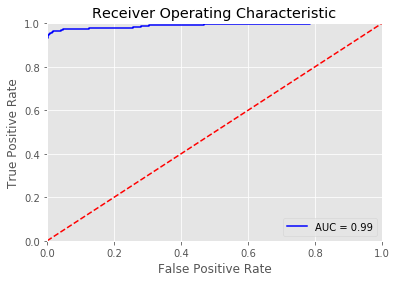

In [113]:
GBC=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=9,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=300,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=None, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False)
GBC.fit(X_train, y_train)

## Training
yhat = GBC.predict(X_train)
yhat_prob = GBC.predict_proba(X_train)
GBC_pred = yhat_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, GBC_pred)
print("Training Accuracy: ", metrics.accuracy_score(y_train, yhat))
print("Training Precision: ", metrics.precision_score(y_train, yhat))
print("Training Recall: ", metrics.recall_score(y_train, yhat))
print("Training F1-Score: ", metrics.f1_score(y_train, yhat))

## Evaluation
yhat = GBC.predict(X_val)
yhat_prob = GBC.predict_proba(X_val)
GBC_pred = yhat_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, GBC_pred)
print("Cross-Validation Accuracy: ", metrics.accuracy_score(y_val, yhat))
print("Cross-Validation Precision: ", metrics.precision_score(y_val, yhat))
print("Cross-Validation Recall: ", metrics.recall_score(y_val, yhat))
print("Cross-Validation F1-Score: ", metrics.f1_score(y_val, yhat))

## Testing
yhat = GBC.predict(X_test)
yhat_prob = GBC.predict_proba(X_test)
GBC_pred = yhat_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, GBC_pred)
print("Testing Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Testing Precision: ", metrics.precision_score(y_test, yhat))
print("Testing Recall: ", metrics.recall_score(y_test, yhat))
print("Testing F1-Score: ", metrics.f1_score(y_test, yhat))


roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
## Alternative Way

In [120]:
y_scores = GBC.predict_proba(X_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [121]:
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    #train
    #print(pd.DataFrame(confusion_matrix(y_train, y_pred_adj),columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))
    # Val
    #print(pd.DataFrame(confusion_matrix(y_val, y_pred_adj),columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))
    
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),columns=['pred_neg', 'pred_pos'],index=['neg', 'pos']))
    
    # plot the curve
    fig=plt.figure(figsize=(8,8))
    plt.title("Precision and Recall Curve with Current Threshold", fontsize=18)
    plt.step(r, p, color='r', alpha=0.8,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.4,
                     color='orangered')
    plt.ylim([0.0, 1.01]);
    plt.xlim([0.0, 1.01]);
    plt.xlabel('Recall', fontsize=18);
    plt.ylabel('Precision', fontsize=18);
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '*', c='k',
            markersize=15)
    fig.savefig('feature importance2.pdf')
###



     pred_neg  pred_pos
neg       709        19
pos        25       703


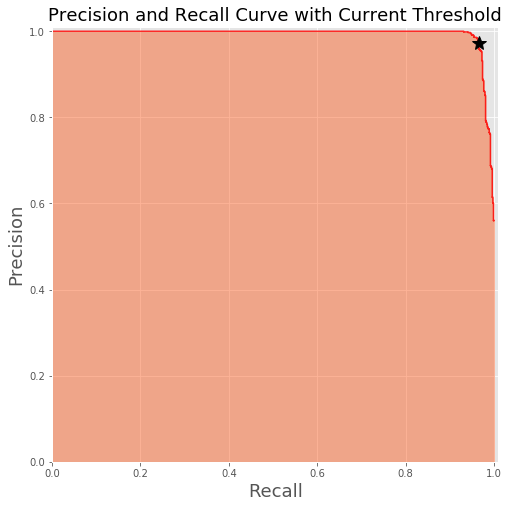

In [127]:
precision_recall_threshold(p, r, thresholds, 0.2)